# <center> ZCYY4: Merging - Creating Final Dataframe

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
import math
import datetime

# Client Data

In [2]:
client_df = pd.read_excel('/Users/aishamilsom/Documents/UCL/TERM 3/DATA/Data used/Client.xlsx')
client_df.head()

,Client_Id,Gender,Ethnic_origin,Current_age,Birthdate,Care_Leaver?,Client_Group_Primary,Client_Group_Secondary_1,Client_Group_Secondary_2,Client_Group_Secondary_3,...,How_Long_in_Care?,"If_No,_Ever_Been_in_Care?",Immigration_status,Keyworker_Id,Local_Authority_of_Origin,Nationality,Sexual_orientation,Transgender,Which_LA_Last_in_Care_of?,Economic_Status
0,0030800002M78VRAAZ,Female,None,20.0,2003-01-01,None,None,None,None,None,...,None,None,Does not wish to disclose,None,None,None,Does not wish to disclose,Does not wish to disclose,None,None
1,0030800002M70HCAAZ,Male,White: British,24.0,1999-01-21,No,Single homeless with support needs,Mental health problems,None,None,...,None,NO,British Citizen,None,Barnsley,UK,Heterosexual,No,None,Job seeker
2,0030800002NCUMQAA5,Male,None,24.0,1999-01-01,None,None,None,None,None,...,None,None,Does not wish to disclose,None,None,None,Does not wish to disclose,Does not wish to disclose,None,None
3,0030800002M6y6fAAB,Male,None,26.0,1996-07-02,None,None,None,None,None,...,None,None,Does not wish to disclose,None,None,None,Does not wish to disclose,Does not wish to disclose,None,None
4,0030800002M6wHJAAZ,Female,None,25.0,1998-01-01,None,None,None,None,None,...,None,None,Not known,None,None,None,Does not wish to disclose,Does not wish to disclose,None,None


In [3]:
client_df['Gender'].value_counts()

Female                       21389
Male                         21247
Does not wish to Disclose     1518
Refused                        997
None                           268
Other                          144
Non-Binary                      77
Gender Fluid                     3
Name: Gender, dtype: int64

In [4]:
# Count the number of unique 'Client_Id' values
unique_client_ids = client_df['Client_Id'].nunique()

# Print the count of unique 'Client_Id' values
print("Number of unique Client_Id values: ", unique_client_ids)

Number of unique Client_Id values:  45643


In [5]:
client_df = client_df.drop(['Client_Group_Secondary_2','Client_Group_Secondary_1', 'Client_Group_Secondary_3','Client_Group_Primary'], axis=1)
client_df.head()

,Client_Id,Gender,Ethnic_origin,Current_age,Birthdate,Care_Leaver?,Current_EET_Status,Died,Disability_types,Disabled_person,...,How_Long_in_Care?,"If_No,_Ever_Been_in_Care?",Immigration_status,Keyworker_Id,Local_Authority_of_Origin,Nationality,Sexual_orientation,Transgender,Which_LA_Last_in_Care_of?,Economic_Status
0,0030800002M78VRAAZ,Female,None,20.0,2003-01-01,None,NaN,False,None,None,...,None,None,Does not wish to disclose,None,None,None,Does not wish to disclose,Does not wish to disclose,None,None
1,0030800002M70HCAAZ,Male,White: British,24.0,1999-01-21,No,NaN,False,None,No,...,None,NO,British Citizen,None,Barnsley,UK,Heterosexual,No,None,Job seeker
2,0030800002NCUMQAA5,Male,None,24.0,1999-01-01,None,NaN,False,None,None,...,None,None,Does not wish to disclose,None,None,None,Does not wish to disclose,Does not wish to disclose,None,None
3,0030800002M6y6fAAB,Male,None,26.0,1996-07-02,None,NaN,False,None,None,...,None,None,Does not wish to disclose,None,None,None,Does not wish to disclose,Does not wish to disclose,None,None
4,0030800002M6wHJAAZ,Female,None,25.0,1998-01-01,None,NaN,False,None,None,...,None,None,Not known,None,None,None,Does not wish to disclose,Does not wish to disclose,None,None


In [6]:
client_df['Died'].value_counts()

False    45627
True        16
Name: Died, dtype: int64

In [7]:
client_df['How_Long_in_Care?'].value_counts()

None                           41630
Over 5 years                    1158
2 - but less than 5 years       1002
1 - but less than 2 years        625
Do not wish to answer            497
1 - but less than 6 months       294
6 - but less than 12 months      287
Under one month                   77
Under one week                    73
Name: How_Long_in_Care?, dtype: int64

In [8]:
client_df['Care_Leaver?'].value_counts()

None                             29608
No                               10604
Yes                               3596
Not known                         1569
No - never been a care leaver      129
False                              117
Refused                             13
True                                 7
Name: Care_Leaver?, dtype: int64

In [9]:
client_df["Care_Leaver?"] = client_df["Care_Leaver?"].replace("None","Unknown")
client_df["Care_Leaver?"] = client_df["Care_Leaver?"].replace("Not known","Unknown")
client_df["Care_Leaver?"] = client_df["Care_Leaver?"].replace("No - never been a care leaver","No")
client_df["Care_Leaver?"] = client_df["Care_Leaver?"].replace("True","Yes")
client_df["Care_Leaver?"] = client_df["Care_Leaver?"].replace("False","No")
client_df["Care_Leaver?"] = client_df["Care_Leaver?"].replace("Not known","Unknown")
client_df["Care_Leaver?"] = client_df["Care_Leaver?"].replace("Refused","Unknown")



In [10]:
client_df['Care_Leaver?'].value_counts()

Unknown    31190
No         10850
Yes         3603
Name: Care_Leaver?, dtype: int64

In [11]:
client_df.rename(columns={'Care_Leaver?': 'is_care_leaver'}, inplace=True)

In [12]:
client_df['Disabled_person'].value_counts()

None                                 27653
No                                   15349
Yes                                   1446
Don't know                             975
Prefer not to say                      158
Yes - but don't wish to disclose        42
Don-Æt Know                             18
Yes - but don-Æt wish to disclose        2
Name: Disabled_person, dtype: int64

In [13]:
client_df["Disabled_person"] = client_df["Disabled_person"].replace("Yes - but don't wish to disclose","Yes")
client_df["Disabled_person"] = client_df["Disabled_person"].replace("Yes - but don-Æt wish to disclose","Yes")
client_df["Disabled_person"] = client_df["Disabled_person"].replace("Don-Æt Know","Don't know")
client_df["Disabled_person"] = client_df["Disabled_person"].replace("None","Unknown")
client_df["Disabled_person"] = client_df["Disabled_person"].replace("Don't know","Unknown")
client_df['Disabled_person'].value_counts()

Unknown              28646
No                   15349
Yes                   1490
Prefer not to say      158
Name: Disabled_person, dtype: int64

# Key Work Sessions Data

In [14]:
keywork_df = pd.read_excel('/Users/aishamilsom/Documents/UCL/TERM 3/DATA/Data used/Keywork Sessions.xlsx')
keywork_df.head()

,keywork_Session_Id,Record_Type_Id,Client_Id,Service_Id,End_Date_Time,Housing_Timeline_Id,Appointment_Date_and_Time,EET_Status,Session_Focus,Session_Status
0,a071p00001jFPFaAAO,0121p0000002veaAAA,003F000001GeZYiIAN,001F000000ya8qXIAQ,NaT,a0j1p00000My7utAAB,2020-05-01 10:00:00,In training or education,Keywork Session,Held - YP Present
1,a071p00001jFXfLAAW,0121p0000002veaAAA,0031p000022TLtqAAG,001F000000ya8qXIAQ,NaT,a0j1p00000M9iXQAAZ,2020-05-05 10:31:00,In training or education,Keywork Session,Held - YP Present
2,a071p00001fvgV8AAI,0121p0000002veaAAA,0032A00002m5BqqQAE,001F000000ya8qXIAQ,NaT,a0j1p00000M9e1xAAB,2020-02-11 13:00:00,In training or education,Keywork Session,Held - YP Present
3,a071p00001jDykIAAS,0121p0000002veaAAA,0032A00002m5BqqQAE,001F000000ya8qXIAQ,NaT,a0j1p00000M9e1xAAB,2020-03-24 16:27:00,In training or education,Keywork Session,Held - YP Present
4,a071p00001mFW3PAAW,0121p0000002veaAAA,0031p000022SlIIAA0,001F000000ya8qXIAQ,NaT,a0j1p00000M9iX6AAJ,2020-06-03 11:45:00,In training or education,Keywork Session,Held - YP Present


In [15]:
# Group by housing timeline id and count the number of instances
# to identify how many keyworker sessions per housing timeline
keywork_df['num_keywork_sessions_offered'] = keywork_df.groupby('Housing_Timeline_Id')['Housing_Timeline_Id'].transform('count')

In [16]:
keywork_df['Session_Status'].value_counts()

Held - YP Present                     36033
Held - YP Not Present                  5916
Booked                                 4859
Not Held                               3136
Attended                               2861
Not Attended - YP Did Not Turn Up       303
Not Attended - YP Cancelled             133
Not Attended - Staff Not Available       17
Name: Session_Status, dtype: int64

In [17]:
keywork_df['Session_Status'] = keywork_df['Session_Status'].replace("Held - YP Not Present", "Unattended by YP")
keywork_df['Session_Status'] = keywork_df['Session_Status'].replace("Held - YP Present", "Attended")
keywork_df['Session_Status'] = keywork_df['Session_Status'].replace("Not Attended - YP Did Not Turn Up", "Unattended by YP")
keywork_df['Session_Status'] = keywork_df['Session_Status'].replace("Not Attended - YP Cancelled", "Unattended by YP")
keywork_df['Session_Status'] = keywork_df['Session_Status'].replace("Not Attended - Staff Not Available", "Unattended by Centrepoint")
keywork_df['Session_Status'] = keywork_df['Session_Status'].replace("Booked", "Attended")

keywork_df['Session_Status'].value_counts()

Attended                     43753
Unattended by YP              6352
Not Held                      3136
Unattended by Centrepoint       17
Name: Session_Status, dtype: int64

In [18]:
# number of attended keywork sessions based on housing timeline
keywork_df['num_attended_keywork_sessions'] = keywork_df.loc[keywork_df["Session_Status"] == "Attended"].groupby("Housing_Timeline_Id")["keywork_Session_Id"].transform('count')


In [19]:
keywork_df = keywork_df.drop(['Record_Type_Id', 'End_Date_Time','EET_Status','Record_Type_Id','Session_Status','Appointment_Date_and_Time'], axis=1)
print(keywork_df.columns)

Index(['keywork_Session_Id', 'Client_Id', 'Service_Id', 'Housing_Timeline_Id',
       'Session_Focus', 'num_keywork_sessions_offered',
       'num_attended_keywork_sessions'],
      dtype='object')


In [20]:
keywork_df['Session_Focus'].value_counts()

Keywork Session                29462
Action Plan & Outcomes Star    18852
Assessment                      2771
Action Plan & Family Star        357
Name: Session_Focus, dtype: int64

In [21]:
# Create a dictionary to map old column names to new column names
column_name_mapping = {'keywork_Session_Id': 'keywork_session_id',
                       'Appointment_Date': 'keywork_session_appt_date',
                      'Housing_Timeline_Id': 'housing_timeline_id'}

# Use the rename() method to change column names
keywork_df = keywork_df.rename(columns=column_name_mapping)

In [22]:
keywork_df.head()

,keywork_session_id,Client_Id,Service_Id,housing_timeline_id,Session_Focus,num_keywork_sessions_offered,num_attended_keywork_sessions
0,a071p00001jFPFaAAO,003F000001GeZYiIAN,001F000000ya8qXIAQ,a0j1p00000My7utAAB,Keywork Session,15.0,14.0
1,a071p00001jFXfLAAW,0031p000022TLtqAAG,001F000000ya8qXIAQ,a0j1p00000M9iXQAAZ,Keywork Session,18.0,16.0
2,a071p00001fvgV8AAI,0032A00002m5BqqQAE,001F000000ya8qXIAQ,a0j1p00000M9e1xAAB,Keywork Session,35.0,33.0
3,a071p00001jDykIAAS,0032A00002m5BqqQAE,001F000000ya8qXIAQ,a0j1p00000M9e1xAAB,Keywork Session,35.0,33.0
4,a071p00001mFW3PAAW,0031p000022SlIIAA0,001F000000ya8qXIAQ,a0j1p00000M9iX6AAJ,Keywork Session,14.0,9.0


### Adding in Keyworker ID for Number of Keyworkers

In [23]:
# additional data file to add in keyworker id for each session 
# to identify how many keyworkers a young person has had
keyworker_id_df = pd.read_csv('/Users/aishamilsom/Documents/UCL/TERM 3/DATA/Data used/Keywork id.csv')
keyworker_id_df.head()

,Keywork_Session_ID,CreatedById,LastModifiedById,Client_Id,Action_Detail,Action_Notes,Timeline_Event_Id,Start_Date,Service_Id,Action_Plan,Record_Type_Name,Session_Status
0,a0708000023cqZjAAI,0050800000DaPZuAAN,005F0000005iRr6IAE,0030800002Kxs6hAAB,Case review,LP had to remind Nicollette to book the PEP me...,a0j0800000V60xNAAR,2022-02-03,001F000001mxx2KIAQ,Yes,Housing - Case Review,Held - YP Present\r
1,a0708000022CtnyAAC,0051p000009RTxpAAG,0052A0000093E3SQAU,0031p00001gZpv9AAC,Case review,YP to contact solicitor for an updated about h...,a0j1p00000KLRw2AAH,2021-09-14,0011p0000278o2SAAQ,Yes,Housing - Case Review,Held - YP Present\r
2,a0708000022CtnyAAC,0051p000009RTxpAAG,0052A0000093E3SQAU,0031p00001gZpv9AAC,Case review,YP to contact solicitor for an updated about h...,a0j1p00000KLRw2AAH,2021-09-14,0011p0000278o2SAAQ,Yes,Housing - Case Review,Held - YP Present\r
3,a0708000022CtnyAAC,0051p000009RTxpAAG,0052A0000093E3SQAU,0031p00001gZpv9AAC,Case review,YP to contact solicitor for an updated about h...,a0j1p00000KLRw2AAH,2021-09-14,0011p0000278o2SAAQ,Yes,Housing - Case Review,Held - YP Present\r
4,a0708000022CtsxAAC,0051p00000AdY8XAAV,0052A0000093E3SQAU,00308000029WzMmAAK,Case review,James and colleagues to do a welfare check at ...,a0j0800000MlKwOAAV,2021-09-14,001F000001SC9flIAD,Yes,Housing - Case Review,Held - YP Not Present\r


In [24]:
keyworker_id_df = keyworker_id_df[['CreatedById','Keywork_Session_ID']]
keyworker_id_df.head()

,CreatedById,Keywork_Session_ID
0,0050800000DaPZuAAN,a0708000023cqZjAAI
1,0051p000009RTxpAAG,a0708000022CtnyAAC
2,0051p000009RTxpAAG,a0708000022CtnyAAC
3,0051p000009RTxpAAG,a0708000022CtnyAAC
4,0051p00000AdY8XAAV,a0708000022CtsxAAC


In [25]:
# created by id is the id of the keyworker who entered the keywork session into the system
# i.e., who the young person interacted with for a particular keywork session
keyworker_id_df = keyworker_id_df.rename(columns = {'CreatedById':'keyworker_id'})
keyworker_id_df = keyworker_id_df.rename(columns = {'Keywork_Session_ID':'keywork_session_id'})

In [26]:
# merging keyworker id with keywork data
# Perform the merge operation
keyworker_sessions_df = pd.merge(keyworker_id_df, keywork_df, on='keywork_session_id', how='inner')

In [27]:
keyworker_sessions_df.head()

,keyworker_id,keywork_session_id,Client_Id,Service_Id,housing_timeline_id,Session_Focus,num_keywork_sessions_offered,num_attended_keywork_sessions
0,0052A000008an2fQAA,a070800001pcEpFAAU,0031p00001ZdullAAB,0012A00002DkrcqQAB,a0j1p00000M9R1nAAF,Assessment,6.0,6.0
1,005F0000002QawSIAS,a070800001pbGSQAA2,0031p00001gXw0VAAS,001F000000ya8qXIAQ,a0j1p00000MyAiOAAV,Keywork Session,29.0,NaN
2,005F0000002QawSIAS,a070800001pbGSQAA2,0031p00001gXw0VAAS,001F000000ya8qXIAQ,a0j1p00000MyAiOAAV,Keywork Session,29.0,NaN
3,005F0000002QawSIAS,a070800001pbGSQAA2,0031p00001gXw0VAAS,001F000000ya8qXIAQ,a0j1p00000MyAiOAAV,Keywork Session,29.0,NaN
4,005F0000002QawSIAS,a070800001pbGSQAA2,0031p00001gXw0VAAS,001F000000ya8qXIAQ,a0j1p00000MyAiOAAV,Keywork Session,29.0,NaN


In [28]:
null_counts = keyworker_sessions_df.isnull().sum()
print(null_counts)

keyworker_id                         0
keywork_session_id                   0
Client_Id                            0
Service_Id                           0
housing_timeline_id                 55
Session_Focus                        0
num_keywork_sessions_offered        55
num_attended_keywork_sessions    11181
dtype: int64


In [29]:
num_key_workers = keyworker_sessions_df.groupby('housing_timeline_id')['keyworker_id'].nunique()

# Create a new column 'num_key_workers' in the dataframe
keyworker_sessions_df['num_keyworkers'] = keyworker_sessions_df['housing_timeline_id'].map(num_key_workers)

In [30]:
keyworker_sessions_df['num_keyworkers'].value_counts()

1.0     23203
2.0     21745
3.0     10991
4.0      6246
5.0      1821
6.0      1544
7.0       813
8.0       456
9.0       124
10.0      120
11.0       90
12.0       63
Name: num_keyworkers, dtype: int64

In [31]:
keyworker_sessions_df.head()

,keyworker_id,keywork_session_id,Client_Id,Service_Id,housing_timeline_id,Session_Focus,num_keywork_sessions_offered,num_attended_keywork_sessions,num_keyworkers
0,0052A000008an2fQAA,a070800001pcEpFAAU,0031p00001ZdullAAB,0012A00002DkrcqQAB,a0j1p00000M9R1nAAF,Assessment,6.0,6.0,1.0
1,005F0000002QawSIAS,a070800001pbGSQAA2,0031p00001gXw0VAAS,001F000000ya8qXIAQ,a0j1p00000MyAiOAAV,Keywork Session,29.0,NaN,2.0
2,005F0000002QawSIAS,a070800001pbGSQAA2,0031p00001gXw0VAAS,001F000000ya8qXIAQ,a0j1p00000MyAiOAAV,Keywork Session,29.0,NaN,2.0
3,005F0000002QawSIAS,a070800001pbGSQAA2,0031p00001gXw0VAAS,001F000000ya8qXIAQ,a0j1p00000MyAiOAAV,Keywork Session,29.0,NaN,2.0
4,005F0000002QawSIAS,a070800001pbGSQAA2,0031p00001gXw0VAAS,001F000000ya8qXIAQ,a0j1p00000MyAiOAAV,Keywork Session,29.0,NaN,2.0


# Housing Timelines Data

In [32]:
housing_timelines_df = pd.read_excel('/Users/aishamilsom/Documents/UCL/TERM 3/DATA/Data used/Housing Timelines.xlsx')
housing_timelines_df.head()

,Id,Housing_Timeline_Id,Record_Type_Id,Client_Id,Referral_Date,Source_of_Referral,Referral_Decision,Reason_for_Rejection,Statutory_Rejection,Service_Id,...,If_Eviction_Other_Please_Specify,Internal_Service,Compelled_to_leave,Left_during_Notice_or_Court_Proceedings,Health_Team_Involvement,Create_a_Floating_Support_Timeline,Floating_Support_Service_Id,Outcomes_Family_Star_Status,Case_Review_Status,Risk_Assessment_Status
0,a0j0800000VteC0AAJ,TE-115222,0121p0000002veiAAA,0031p000023VRY1AAO,2021-09-09,None,referral accepted,None,None,001F00000135zyCIAQ,...,None,None,No,No,No,Yes,001F000000ya8qXIAQ,Out of Date,Out of Date,Out of Date
1,a0j0800000VteCFAAZ,TE-115224,0121p0000002veiAAA,0030800002M6Xn0AAF,2021-09-10,None,referral accepted,None,None,0012A000029yYSbQAM,...,Non-engagement,None,Yes,None,No,No,None,Out of Date,Out of Date,Out of Date
2,a0j0800000VteBlAAJ,TE-115219,0121p0000002veiAAA,0030800002M6XPFAA3,2021-09-10,None,None,None,None,001F00000135zyCIAQ,...,None,None,None,None,None,None,None,Out of Date,Out of Date,Out of Date
3,a0j0800000VtgcKAAR,TE-115832,0121p0000002veiAAA,0030800002M8q1SAAR,2021-09-27,None,referral accepted,None,None,0011p0000278o2SAAQ,...,None,None,No,No,No,No,None,Out of Date,Out of Date,Out of Date
4,a0j0800000VteGMAAZ,TE-115249,0121p0000002veiAAA,0030800002M6qCtAAJ,2021-09-12,None,referral accepted,None,None,001F000000wrkxLIAQ,...,None,None,No,No,No,No,None,Out of Date,Out of Date,Out of Date


In [33]:
print(housing_timelines_df.columns)

Index(['Id', 'Housing_Timeline_Id', 'Record_Type_Id', 'Client_Id',
       'Referral_Date', 'Source_of_Referral', 'Referral_Decision',
       'Reason_for_Rejection', 'Statutory_Rejection', 'Service_Id',
       'EET_on_Arrival', 'Timeline_Start_Date', 'Timeline_End_Date',
       'Timeline_Status', 'Days_in_Service', 'Days_in_Service_Band',
       'EET_on_Departure', 'Positive_Move', 'Departure_Destination',
       'Departure_Type', 'If_Eviction_Other_Please_Specify',
       'Internal_Service', 'Compelled_to_leave',
       'Left_during_Notice_or_Court_Proceedings', 'Health_Team_Involvement',
       'Create_a_Floating_Support_Timeline', 'Floating_Support_Service_Id',
       'Outcomes_Family_Star_Status', 'Case_Review_Status',
       'Risk_Assessment_Status'],
      dtype='object')


In [34]:
# Count the number of unique Housing_Timeline_Ids
# housing timeline id is used for Centrepoint's inform - we will be using 'id'
num_unique_timeline_ids = len(housing_timelines_df['Housing_Timeline_Id'].unique())

# Print the result
print("The number of unique Housing_Timeline_Ids is:", num_unique_timeline_ids)

The number of unique Housing_Timeline_Ids is: 19408


In [35]:
num_unique_ids = len(housing_timelines_df['Id'].unique())
print(num_unique_ids)

19408


In [36]:
housing_timelines_df = housing_timelines_df[['Id','Housing_Timeline_Id', 'Record_Type_Id', 'Client_Id', 'Service_Id','Days_in_Service', 'EET_on_Arrival', 'Days_in_Service_Band', 'EET_on_Departure', 'Positive_Move', 'Departure_Destination','Timeline_Start_Date','Timeline_End_Date']].copy()
housing_timelines_df.head()

,Id,Housing_Timeline_Id,Record_Type_Id,Client_Id,Service_Id,Days_in_Service,EET_on_Arrival,Days_in_Service_Band,EET_on_Departure,Positive_Move,Departure_Destination,Timeline_Start_Date,Timeline_End_Date
0,a0j0800000VteC0AAJ,TE-115222,0121p0000002veiAAA,0031p000023VRY1AAO,001F00000135zyCIAQ,63.0,No,Months 0-3,Yes,Yes,moved to take up an LA tenancy (general needs),2021-09-09,2021-11-10
1,a0j0800000VteCFAAZ,TE-115224,0121p0000002veiAAA,0030800002M6Xn0AAF,0012A000029yYSbQAM,163.0,No,Months 3-6,Yes,Yes,staying with family members,2021-09-13,2022-02-22
2,a0j0800000VteBlAAJ,TE-115219,0121p0000002veiAAA,0030800002M6XPFAA3,001F00000135zyCIAQ,NaN,None,None,None,No,None,NaT,NaT
3,a0j0800000VtgcKAAR,TE-115832,0121p0000002veiAAA,0030800002M8q1SAAR,0011p0000278o2SAAQ,58.0,Yes,Months 0-3,No,Yes,moved into supported housing,2021-09-27,2021-11-23
4,a0j0800000VteGMAAZ,TE-115249,0121p0000002veiAAA,0030800002M6qCtAAJ,001F000000wrkxLIAQ,8.0,No,Months 0-3,No,Yes,moved into supported housing,2021-09-12,2021-09-19


In [37]:
# distinction between the id and housing timeline id in this df 
# id will link to other dataframes, housing timeline id in this df only useful for centrepoint's inform system
housing_timelines_df = housing_timelines_df.rename(columns={'Id': 'housing_timeline_id'})
housing_timelines_df = housing_timelines_df.rename(columns={'Housing_Timeline_Id': 'inform_housing_timeline_id'})


In [38]:
# dropping records with no timeline end date
housing_timelines_df = housing_timelines_df[housing_timelines_df['Timeline_End_Date'].notnull()]

In [39]:
# only including timelines with an end date from 2019 and onwards (wanting to evaluate most recent 4 years)
# convert the "Timeline_End_Date" column to a datetime object
housing_timelines_df["Timeline_End_Date"] = pd.to_datetime(housing_timelines_df["Timeline_End_Date"])
housing_timelines_df["Timeline_Start_Date"] = pd.to_datetime(housing_timelines_df["Timeline_Start_Date"])

# filter the dataframe to only include rows where the "Timeline_End_Date" is on or after January 1, 2019
housing_timelines_df = housing_timelines_df[housing_timelines_df["Timeline_End_Date"] >= pd.to_datetime("2019-01-01")]

In [40]:
housing_timelines_df = housing_timelines_df.rename(columns={'Timeline_End_Date': 'housing_timeline_end_date'})
housing_timelines_df = housing_timelines_df.rename(columns={'Timeline_Start_Date': 'housing_timeline_start_date'})

In [41]:
#only including days in service of beyond 1 month (otherwise centrepoint wont see an impact from their service)
housing_timelines_df = housing_timelines_df[housing_timelines_df["Days_in_Service"] > 30]

In [42]:
print(housing_timelines_df.shape)

(3731, 13)


In [43]:
housing_timelines_df['Departure_Destination'].value_counts()

moved to take up an LA tenancy (general needs)      725
Internal Service Move                               436
moved into supported housing                        411
Remained in own tenancy                             400
staying with family members                         365
Floated off                                         283
moved to take up an RSL tenancy (general needs)     239
staying with friends                                226
renting privately owned accommodation               210
not known                                           169
returned to previous home                           100
taken into custody                                   53
moved into accomm as owner occupier                  31
moved into bed & breakfast                           30
CP Floating Support ended whilst in move through     13
Entered Long Stay Hospital - Mental Health           12
Taken into Care                                       9
died                                            

In [44]:
# prepping for target variable (binary departure destinations)
# positive or negative move
housing_timelines_df['Departure_Destination'] = housing_timelines_df['Departure_Destination'].replace({
    'moved into accomm as owner occupier': 1,
    'moved to take up an LA tenancy (general needs)': 1,
    'moved to take up a LA tenancy (general needs)'
    'moved to take up an RSL tenancy (general needs)': 1,
    'renting privately owned accommodation': 1,
    'returned to previous home': 1,
    'staying with family members': 1,
}).fillna(0)


In [45]:
for col in housing_timelines_df.columns:
    print(col)

housing_timeline_id
inform_housing_timeline_id
Record_Type_Id
Client_Id
Service_Id
Days_in_Service
EET_on_Arrival
Days_in_Service_Band
EET_on_Departure
Positive_Move
Departure_Destination
housing_timeline_start_date
housing_timeline_end_date


# Health Sessions Data

In [46]:
health_sessions_df = pd.read_excel('/Users/aishamilsom/Documents/UCL/TERM 3/DATA/Data used/Health Sessions.xlsx')
health_sessions_df.head()

,Health_Session_Id,Record_Type_Id,Client_Id,Service,End_Date_Time,Health_Timeline_Id,Session_Type,Appointment_Date_and_Time,Session_Status,Health_Session_Number
0,a0708000022CtdIAAS,0121p0000002veVAAQ,0030800002AvplRAAR,Support Programme,NaN,a0j0800000MlbWCAAZ,Part of programme/ongoing support,2021-09-13 15:30:00,Attended,18.0
1,a0708000022FAaVAAW,0121p0000002veVAAQ,0031p000025yejlAAA,Support Programme,NaN,a0j0800000TXTOcAAP,Part of programme/ongoing support,2021-10-29 14:00:00,Attended,2.0
2,a0708000022FASlAAO,0121p0000002veVAAQ,0031p00001pwmdlAAA,Support Programme,NaN,a0j0800000TXHQ0AAP,Part of programme/ongoing support,2021-10-29 12:00:00,Attended,6.0
3,a0708000022CyDHAA0,0121p0000002veVAAQ,0031p000022VSTdAAO,Support Programme,NaN,a0j0800000TXZ3LAAX,Part of programme/ongoing support,2021-09-15 11:04:00,Attended,5.0
4,a0708000022Cz8rAAC,0121p0000002veVAAQ,0031p00001nnuMNAAY,Support Programme,NaN,a0j0800000TXaG1AAL,Part of programme/ongoing support,2021-09-30 13:00:00,Attended,10.0


In [47]:
health_sessions_df['Session_Status'].value_counts()

Attended                              11565
Not Attended - YP Cancelled            2658
Not Attended - YP Did Not Turn Up      2538
Not Attended - Staff Not Available      414
Booked                                  156
Not Attended - YP Could Not Attend       32
Held - YP Present                         1
Held - YP Not Present                     1
Name: Session_Status, dtype: int64

In [48]:
health_sessions_df["Session_Status"] = health_sessions_df["Session_Status"].replace("Held - YP Not Present", "Not Attended - YP Did Not Turn Up")

In [49]:
health_sessions_df['Session_Status'].value_counts()

Attended                              11565
Not Attended - YP Cancelled            2658
Not Attended - YP Did Not Turn Up      2539
Not Attended - Staff Not Available      414
Booked                                  156
Not Attended - YP Could Not Attend       32
Held - YP Present                         1
Name: Session_Status, dtype: int64

In [50]:
health_sessions_df["Session_Status"] = health_sessions_df["Session_Status"].replace("Held - YP Present", "Attended")
health_sessions_df['Session_Status'].value_counts()

Attended                              11566
Not Attended - YP Cancelled            2658
Not Attended - YP Did Not Turn Up      2539
Not Attended - Staff Not Available      414
Booked                                  156
Not Attended - YP Could Not Attend       32
Name: Session_Status, dtype: int64

In [51]:
health_sessions_df["Session_Status"] = health_sessions_df["Session_Status"].replace("Not Attended - YP Cancelled", "Not Attended")
health_sessions_df['Session_Status'].value_counts()

Attended                              11566
Not Attended                           2658
Not Attended - YP Did Not Turn Up      2539
Not Attended - Staff Not Available      414
Booked                                  156
Not Attended - YP Could Not Attend       32
Name: Session_Status, dtype: int64

In [52]:
health_sessions_df["Session_Status"] = health_sessions_df["Session_Status"].replace("Not Attended - YP Did Not Turn Up", "Not Attended")
health_sessions_df["Session_Status"] = health_sessions_df["Session_Status"].replace("Not Attended - Staff Not Available", "Not Attended")
health_sessions_df["Session_Status"] = health_sessions_df["Session_Status"].replace("Not Attended - YP Could Not Attend", "Not Attended")
health_sessions_df["Session_Status"] = health_sessions_df["Session_Status"].replace("Held - YP Present", "Attended")
health_sessions_df["Session_Status"] = health_sessions_df["Session_Status"].replace("Booked", "Attended")
health_sessions_df['Session_Status'].value_counts()

Attended        11722
Not Attended     5643
Name: Session_Status, dtype: int64

In [53]:
health_sessions_df['Appointment_Date_and_Time'] = pd.to_datetime(health_sessions_df['Appointment_Date_and_Time'])
health_sessions_df.rename(columns = {'Appointment_Date_and_Time':'Health_Session_Appointment_Date_and_Time'}, inplace = True)

In [54]:
# to connect health sessions based on housing timeline id rather than client id for accuracy
# we have to match based on the client id, the date of the health session, and the start and end date of 
# a housing timeline
# this will then identify which health session of a certain client id belongs to which of their housing timelines

def match_housing_timeline(row, housing_timelines_df):
    client_id = row['Client_Id']
    appointment_date = row['Health_Session_Appointment_Date_and_Time']
    matching_rows = housing_timelines_df[
        (housing_timelines_df['Client_Id'] == client_id) &
        (housing_timelines_df['housing_timeline_start_date'] <= appointment_date) &
        (housing_timelines_df['housing_timeline_end_date'] >= appointment_date)
    ]
    if len(matching_rows) > 0:
        return matching_rows['housing_timeline_id'].values[0]
    else:
        return None

# Apply the function to create a new column 'Housing_Timeline_Id' in Health Sessions dataframe
health_sessions_df['housing_timeline_id'] = health_sessions_df.apply(lambda row: match_housing_timeline(row, housing_timelines_df), axis=1)

# Print the updated Health Sessions dataframe
print(health_sessions_df)

        Health_Session_Id      Record_Type_Id           Client_Id  \
0      a0708000022CtdIAAS  0121p0000002veVAAQ  0030800002AvplRAAR   
1      a0708000022FAaVAAW  0121p0000002veVAAQ  0031p000025yejlAAA   
2      a0708000022FASlAAO  0121p0000002veVAAQ  0031p00001pwmdlAAA   
3      a0708000022CyDHAA0  0121p0000002veVAAQ  0031p000022VSTdAAO   
4      a0708000022Cz8rAAC  0121p0000002veVAAQ  0031p00001nnuMNAAY   
...                   ...                 ...                 ...   
17360  a071p00001kH7AdAAK  0121p0000002veVAAQ  0031p00001z7ay5AAA   
17361  a071p00001mINJUAA4  0121p0000002veVAAQ  0031p000024ymO9AAI   
17362  a070800001pa7GdAAI  0121p0000002veVAAQ  0031p00001nnuMNAAY   
17363  a071p00001bTIXKAA4  0121p0000002veVAAQ  0031p00001noitlAAA   
17364  a071p00001mFxfvAAC  0121p0000002veVAAQ  0031p000023WtWxAAK   

                 Service  End_Date_Time  Health_Timeline_Id  \
0      Support Programme            NaN  a0j0800000MlbWCAAZ   
1      Support Programme            NaN  a0j0

In [55]:
# Count null values in each column
null_counts = health_sessions_df.isnull().sum()
print(null_counts)

Health_Session_Id                               0
Record_Type_Id                                  0
Client_Id                                       0
Service                                         0
End_Date_Time                               17365
Health_Timeline_Id                            219
Session_Type                                   32
Health_Session_Appointment_Date_and_Time        0
Session_Status                                  0
Health_Session_Number                         156
housing_timeline_id                         10265
dtype: int64


In [56]:
# Create a new column "num_health_sessions" which shows the count of health sessions for each housint timeline id
# health_sessions_df["num_health_sessions"] = health_sessions_df.groupby("Client_Id")["Health_Session_Id"].transform("count")

# ONLY INCLUDING ATTENDED HEALTH SESSIONS
# Create a new column "num_attended_health_sessions" which shows the count of attended health sessions for each client_id
health_sessions_df["num_attended_health_sessions"] = health_sessions_df.loc[health_sessions_df["Session_Status"] == "Attended"].groupby("housing_timeline_id")["Health_Session_Id"].transform("count")
health_sessions_df["num_health_sessions_offered"] = health_sessions_df.loc[health_sessions_df["Session_Status"] != "Attended"].groupby("housing_timeline_id")["Health_Session_Id"].transform("count")

# Print the updated DataFrame
health_sessions_df.head()

,Health_Session_Id,Record_Type_Id,Client_Id,Service,End_Date_Time,Health_Timeline_Id,Session_Type,Health_Session_Appointment_Date_and_Time,Session_Status,Health_Session_Number,housing_timeline_id,num_attended_health_sessions,num_health_sessions_offered
0,a0708000022CtdIAAS,0121p0000002veVAAQ,0030800002AvplRAAR,Support Programme,NaN,a0j0800000MlbWCAAZ,Part of programme/ongoing support,2021-09-13 15:30:00,Attended,18.0,None,NaN,NaN
1,a0708000022FAaVAAW,0121p0000002veVAAQ,0031p000025yejlAAA,Support Programme,NaN,a0j0800000TXTOcAAP,Part of programme/ongoing support,2021-10-29 14:00:00,Attended,2.0,None,NaN,NaN
2,a0708000022FASlAAO,0121p0000002veVAAQ,0031p00001pwmdlAAA,Support Programme,NaN,a0j0800000TXHQ0AAP,Part of programme/ongoing support,2021-10-29 12:00:00,Attended,6.0,None,NaN,NaN
3,a0708000022CyDHAA0,0121p0000002veVAAQ,0031p000022VSTdAAO,Support Programme,NaN,a0j0800000TXZ3LAAX,Part of programme/ongoing support,2021-09-15 11:04:00,Attended,5.0,None,NaN,NaN
4,a0708000022Cz8rAAC,0121p0000002veVAAQ,0031p00001nnuMNAAY,Support Programme,NaN,a0j0800000TXaG1AAL,Part of programme/ongoing support,2021-09-30 13:00:00,Attended,10.0,None,NaN,NaN


In [57]:
health_sessions_df = health_sessions_df.drop(['Health_Session_Number', 'Record_Type_Id','End_Date_Time','Health_Session_Appointment_Date_and_Time','Session_Status','Service'], axis=1)
health_sessions_df.rename(columns={'Housing_Timeline_Id': 'housing_timeline_id'}, inplace=True)

In [58]:
health_sessions_df = health_sessions_df.drop(['Session_Type', 'Health_Timeline_Id','Health_Session_Id','Client_Id'], axis=1)
health_sessions_df.head()

,housing_timeline_id,num_attended_health_sessions,num_health_sessions_offered
0,None,NaN,NaN
1,None,NaN,NaN
2,None,NaN,NaN
3,None,NaN,NaN
4,None,NaN,NaN


In [59]:
# only keep first housing timeline ids to get their num attended health sessions
health_sessions_df.drop_duplicates(subset='housing_timeline_id', keep='first', inplace=True)

# Service Data

In [60]:
service_df = pd.read_csv('/Users/aishamilsom/Documents/UCL/TERM 3/DATA/Data used/service name and operations.csv')
service_df.head()

,Service_Id,Service_Name,Available_Bedspaces,Property_Owner,Inception,Decommission,Support_Needs_Level,Support_Type,Tenancy_Type,Service_Cover_Type,...,Former_Arrears,Total_Rent_Receivable,Most_Recent_Tenancy_Balance,Frequency_of_Action_Plan/Outcomes Star,Frequency_of_Case_Reviews_(Days),Frequency_of_Outcomes_Stars_(Days),Frequency_of_Risk_Assessments_(Days),Most_Recent_Rota,Record_Type_Id,Last_Refresh
0,001F000001SC8mPIAT,Down Place,9.0,Notting Hill Housing Trust,2015-05-01,NaN,Low support,Not 24 Hour,Licence agreement,Day Cover - Accom Based,...,4283.39,151409.336,2023-02-26,90,90,90,90,2020-05-15,012A0000000UbnHIAS,2023-02-28 11:33:11.000
1,001F000001SC97pIAD,Masbro Road,12.0,Notting Hill Housing Trust,2015-05-01,NaN,High support,24 Hour,Assured Shorthold,24-7 Single Cover,...,34329.53,165699.528,2023-02-26,30,90,90,30,2020-05-25,012A0000000UbnHIAS,2023-02-28 11:33:11.000
2,001F000000qeiVaIAI,Canning Road,6.0,Genesis Housing Association,2013-01-28,NaN,Low support,Not 24 Hour,Licence agreement,24-7 Single Cover,...,1818.31,45646.224,2023-02-26,30,90,90,30,2020-05-22,012A0000000UbnHIAS,2023-02-28 11:33:11.000
3,001F000001mxx2KIAQ,Kingshill Avenue 76,5.0,Notting Hill Housing Trust,NaN,NaN,High support,24 Hour,Licence agreement,24-7 Single Cover,...,1924.51,44252.676,2023-02-26,30,90,90,30,2020-05-22,012A0000000UbnHIAS,2023-02-28 11:33:11.000
4,001A000000F1z6bIAB,Ealing Hostel,17.0,Centrepoint,NaN,NaN,Medium support,24 Hour,Licence agreement,24-7 Single Cover,...,35404.96,276476.304,2023-02-26,30,90,90,30,2020-05-18,012A0000000UbnHIAS,2023-02-28 11:33:11.000


In [61]:
service_df = service_df[['Service_Id','Support_Type','Support_Needs_Level','Service_Name','Frequency_of_Risk_Assessments_(Days)','Frequency_of_Action_Plan/Outcomes Star','Frequency_of_Outcomes_Stars_(Days)']]
service_df.head()

,Service_Id,Support_Type,Support_Needs_Level,Service_Name,Frequency_of_Risk_Assessments_(Days),Frequency_of_Action_Plan/Outcomes Star,Frequency_of_Outcomes_Stars_(Days)
0,001F000001SC8mPIAT,Not 24 Hour,Low support,Down Place,90,90,90
1,001F000001SC97pIAD,24 Hour,High support,Masbro Road,30,30,90
2,001F000000qeiVaIAI,Not 24 Hour,Low support,Canning Road,30,30,90
3,001F000001mxx2KIAQ,24 Hour,High support,Kingshill Avenue 76,30,30,90
4,001A000000F1z6bIAB,24 Hour,Medium support,Ealing Hostel,30,30,90


In [62]:
service_df['Service_Name'].value_counts()

Fairchild                                 2
Down Place                                1
Delancey House                            1
CTC - Programme Centre (non-OSW) error    1
CTC - Southwark New Deal (non-OSW)        1
                                         ..
Downham Way 281                           1
Rattray Court 26                          1
Shirland Road                             1
Bravington Road                           1
Centrepoint Works                         1
Name: Service_Name, Length: 368, dtype: int64

In [63]:
service_df['Support_Type'].value_counts()

Independent Living (FMT)              99
None                                  69
Not 24 Hour                           48
Not Specified                         47
24 Hour                               32
Independent Living (Converted FMT)    22
Floating Support                      18
Move On                               16
Office                                 9
visiting support                       5
Independent Living                     4
Name: Support_Type, dtype: int64

In [64]:
# adding in region of service based on the service name with an additional file provided by Centrepoint
service_region_df = pd.read_csv('/Users/aishamilsom/Documents/UCL/TERM 3/DATA/Data used/service names and regions.csv')
service_region_df.head()

,Region,Service Name,Decommission,Operations Manager
0,Yorkshire,Highfield Terrace,NaN,Chris Denton
1,Yorkshire,Quarry View,NaN,Chris Denton
2,Yorkshire,Barnsley Floating Support,NaN,Chris Denton
3,North East England,Harbour View,01/04/2021,Donna Grieves
4,North East England,Bell House,01/04/2021,Donna Grieves


In [65]:
service_region_df = service_region_df[['Service Name','Region']]
service_region_df.rename(columns={'Service Name': 'Service_Name'}, inplace=True)

In [66]:
service_merged_df = pd.merge(service_df, service_region_df, on='Service_Name')
service_merged_df.head()

,Service_Id,Support_Type,Support_Needs_Level,Service_Name,Frequency_of_Risk_Assessments_(Days),Frequency_of_Action_Plan/Outcomes Star,Frequency_of_Outcomes_Stars_(Days),Region
0,001F000001SC8mPIAT,Not 24 Hour,Low support,Down Place,90,90,90,West and Central London
1,001F000001SC97pIAD,24 Hour,High support,Masbro Road,30,30,90,West and Central London
2,001F000001SC9flIAD,24 Hour,High support,Weltje Road,30,30,90,West and Central London
3,001F000001SC9JiIAL,Not 24 Hour,Medium support,Thornfield Road,90,90,90,West and Central London
4,001F000000wrkRoIAI,24 Hour,High support,Woodstock Grove,30,30,90,West and Central London


In [67]:
# checking for nulls
null_counts_service = service_merged_df.isnull().sum()
print(null_counts_service)

Service_Id                                0
Support_Type                              0
Support_Needs_Level                       3
Service_Name                              0
Frequency_of_Risk_Assessments_(Days)      0
Frequency_of_Action_Plan/Outcomes Star    0
Frequency_of_Outcomes_Stars_(Days)        0
Region                                    0
dtype: int64


In [68]:
service_merged_df = service_merged_df.rename(columns={'Service_Id': 'service_id'})
service_merged_df = service_merged_df.rename(columns={'Region': 'service_region'})


# Merging Stage 1

In [69]:
# merging client demographic data based on client id to their respective housing timelines
merged_df = housing_timelines_df.merge(client_df, on='Client_Id')
merged_df.head()

,housing_timeline_id,inform_housing_timeline_id,Record_Type_Id,Client_Id,Service_Id,Days_in_Service,EET_on_Arrival,Days_in_Service_Band,EET_on_Departure,Positive_Move,...,How_Long_in_Care?,"If_No,_Ever_Been_in_Care?",Immigration_status,Keyworker_Id,Local_Authority_of_Origin,Nationality,Sexual_orientation,Transgender,Which_LA_Last_in_Care_of?,Economic_Status
0,a0j0800000VteC0AAJ,TE-115222,0121p0000002veiAAA,0031p000023VRY1AAO,001F00000135zyCIAQ,63.0,No,Months 0-3,Yes,Yes,...,Over 5 years,YES,British Citizen,None,Bradford,UK,Does not wish to disclose,No,Bradford,Job seeker
1,a0j0800000Vtn0RAAR,TE-117086,0121p0000002vegAAA,0031p000023VRY1AAO,001F000000ya8qXIAQ,239.0,No,Months 6-12,Yes,Yes,...,Over 5 years,YES,British Citizen,None,Bradford,UK,Does not wish to disclose,No,Bradford,Job seeker
2,a0j0800000MlewCAAR,TE-108181,0121p0000002vegAAA,0031p000023VRY1AAO,001F000000ya8qXIAQ,220.0,Yes,Months 6-12,Yes,No,...,Over 5 years,YES,British Citizen,None,Bradford,UK,Does not wish to disclose,No,Bradford,Job seeker
3,a0j1p00000Ml58MAAR,TE-101776,0121p0000002veiAAA,0031p000023VRY1AAO,001F00000135zyCIAQ,216.0,No,Months 6-12,Yes,Yes,...,Over 5 years,YES,British Citizen,None,Bradford,UK,Does not wish to disclose,No,Bradford,Job seeker
4,a0j0800000VteCFAAZ,TE-115224,0121p0000002veiAAA,0030800002M6Xn0AAF,0012A000029yYSbQAM,163.0,No,Months 3-6,Yes,Yes,...,None,NO,British Citizen,None,Barnsley,UK,Heterosexual,No,None,Job seeker


In [70]:
merged_df['housing_timeline_id'].value_counts()

a0j0800000VteC0AAJ    1
a0j1p00000DwgVHAAZ    1
a0j0800000MlYLPAA3    1
a0j1p00000M99eEAAR    1
a0j0800000VuDliAAF    1
                     ..
a0j1p00000M9WCqAAN    1
a0j0800000MlQnwAAF    1
a0j1p00000JIW5fAAH    1
a0j1p00000KKk2yAAD    1
a0j1p00000M9WOJAA3    1
Name: housing_timeline_id, Length: 3731, dtype: int64

In [71]:
merged_df['Birthdate'].value_counts()

2001-01-01    19
2002-01-01    15
2000-01-01    15
1999-01-01    12
2001-07-11    10
              ..
2003-03-23     1
1999-10-30     1
2001-05-26     1
2004-05-18     1
1997-06-08     1
Name: Birthdate, Length: 1994, dtype: int64

In [72]:
sorted_timeline_start = pd.to_datetime(merged_df["housing_timeline_start_date"]).sort_values()
sorted_birthdate = pd.to_datetime(merged_df["Birthdate"]).sort_values()
print(sorted_timeline_start.iloc[0], sorted_timeline_start.iloc[-1])
print(sorted_birthdate.iloc[0], sorted_birthdate.iloc[-1])

2010-10-25 00:00:00 2022-12-16 00:00:00
1989-04-03 00:00:00 2021-05-08 00:00:00


In [73]:
# using their birthdat and the housing timeline start date to get a client's age on arrival of the service
merged_df["age_on_arrival"] = (pd.to_datetime(merged_df["housing_timeline_start_date"]) - pd.to_datetime(merged_df["Birthdate"])).dt.days // 365

In [74]:
merged_df['age_on_arrival'].value_counts()

18    843
17    625
19    525
20    426
21    304
16    257
22    244
23    193
24    186
25     94
15     12
26      7
14      4
28      3
12      2
27      2
13      2
0       1
30      1
Name: age_on_arrival, dtype: int64

In [75]:
# errors inputing the data may be the result of the ages that are not within the age bracket centrepoint serves
# refining the data to only include age on arrival between 16 and 25
merged_df['age_on_arrival'] = merged_df['age_on_arrival'].fillna(0).astype(int)
merged_df['age_on_arrival'] = merged_df['age_on_arrival'].astype(int)
merged_df = merged_df[(merged_df['age_on_arrival'] >= 16) & (merged_df['age_on_arrival'] <= 25)]

In [76]:
merged_df['age_on_arrival'].value_counts()

18    843
17    625
19    525
20    426
21    304
16    257
22    244
23    193
24    186
25     94
Name: age_on_arrival, dtype: int64

In [77]:
print(merged_df.columns)

Index(['housing_timeline_id', 'inform_housing_timeline_id', 'Record_Type_Id',
       'Client_Id', 'Service_Id', 'Days_in_Service', 'EET_on_Arrival',
       'Days_in_Service_Band', 'EET_on_Departure', 'Positive_Move',
       'Departure_Destination', 'housing_timeline_start_date',
       'housing_timeline_end_date', 'Gender', 'Ethnic_origin', 'Current_age',
       'Birthdate', 'is_care_leaver', 'Current_EET_Status', 'Died',
       'Disability_types', 'Disabled_person',
       'Ever_been_a_victim_of_crime_or_violence?',
       'Ever_been_in_Bed_&_Breakfast',
       'Ever_been_in_Hostel_/_supported_housing', 'Ever_been_in_Prison_/_YOI',
       'Ever_been_in_Probation_/_Bail_Hostel',
       'Ever_been_in_Remand_/_detention_centre',
       'Ever_convicted_of_an_offence?', 'Ever_Run_Away_from_Home_Under_16?',
       'Ever_Slept_Rough?', 'Has_children', 'How_Long_in_Care?',
       'If_No,_Ever_Been_in_Care?', 'Immigration_status', 'Keyworker_Id',
       'Local_Authority_of_Origin', 'Nationalit

In [78]:
merged_df["Departure_Destination"].value_counts()

1                                                   1409
Internal Service Move                                434
moved into supported housing                         410
Remained in own tenancy                              398
Floated off                                          281
moved to take up an RSL tenancy (general needs)      238
staying with friends                                 225
not known                                            167
taken into custody                                    53
moved into bed & breakfast                            30
CP Floating Support ended whilst in move through      13
Entered Long Stay Hospital - Mental Health            12
Taken into Care                                        8
died                                                   5
sleeping rough                                         4
rehab clinic                                           3
DV Refuge                                              3
moved into CP general needs    

In [79]:
# 0 or 1 binary adjustment for target variable
merged_df["Departure_Destination"] = merged_df["Departure_Destination"].replace(to_replace=[value for value in merged_df["Departure_Destination"].unique() if value != 1], value=0)
merged_df["Departure_Destination"].value_counts()

0    2288
1    1409
Name: Departure_Destination, dtype: int64

In [80]:
# changing name of variable for better understanding
merged_df = merged_df.rename(columns={"Departure_Destination": "move_to_live_independently"})

In [81]:
merged_df = merged_df.drop(['Birthdate','Disability_types','Current_age','Positive_Move'], axis=1)

In [82]:
merged_df['Ever_been_in_Remand_/_detention_centre'].value_counts()

None         2232
No           1360
Yes            61
Not known      43
Refused         1
Name: Ever_been_in_Remand_/_detention_centre, dtype: int64

In [83]:
# refining values for simpler interpretation
merged_df["Ever_been_in_Remand_/_detention_centre"] = merged_df["Ever_been_in_Remand_/_detention_centre"].replace("None", "Unknown")
merged_df["Ever_been_in_Remand_/_detention_centre"] = merged_df["Ever_been_in_Remand_/_detention_centre"].replace("Not known", "Unknown")
merged_df["Ever_been_in_Remand_/_detention_centre"] = merged_df["Ever_been_in_Remand_/_detention_centre"].replace("Refused", "Unknown")
merged_df['Ever_been_in_Remand_/_detention_centre'].value_counts()

Unknown    2276
No         1360
Yes          61
Name: Ever_been_in_Remand_/_detention_centre, dtype: int64

In [84]:
merged_df['Ethnic_origin'].value_counts()

White: British                        1625
Black/Black British: African           523
Black/Black British: Caribbean         276
Did not wish to disclose               180
Mixed: White & Black Caribbean         166
Asian/Asian British: Pakistani         162
White: Other                           156
Arab                                   131
Asian/Asian British: Other             113
Mixed: Other                            97
Black/Black British: Other              77
Mixed: White & Asian                    59
Mixed: White & Black African            39
Chinese/Other ethnic group: Other       27
Asian/Asian British: Bangladeshi        21
Asian/Asian British: Indian             21
White: Irish                             9
Chinese/Other ethnic group:Chinese       7
None                                     5
Gypsy/Irish Traveller                    3
Name: Ethnic_origin, dtype: int64

In [85]:
# refining values for simpler interpretation
merged_df["Ever_been_a_victim_of_crime_or_violence?"] = merged_df["Ever_been_a_victim_of_crime_or_violence?"].replace("None", "Unknown")
merged_df['Ever_been_a_victim_of_crime_or_violence?'].value_counts()

Unknown    2365
No          981
Yes         351
Name: Ever_been_a_victim_of_crime_or_violence?, dtype: int64

In [86]:
# refining values for simpler interpretation
merged_df["Ever_been_in_Bed_&_Breakfast"] = merged_df["Ever_been_in_Bed_&_Breakfast"].replace("None", "Unknown")
merged_df["Ever_been_in_Bed_&_Breakfast"] = merged_df["Ever_been_in_Bed_&_Breakfast"].replace("Not known", "Unknown")
merged_df["Ever_been_in_Bed_&_Breakfast"] = merged_df["Ever_been_in_Bed_&_Breakfast"].replace("Refused", "Unknown")
merged_df['Ever_been_in_Bed_&_Breakfast'].value_counts()

Unknown    2358
No         1210
Yes         129
Name: Ever_been_in_Bed_&_Breakfast, dtype: int64

In [87]:
# refining values for simpler interpretation
merged_df["Ever_been_in_Hostel_/_supported_housing"] = merged_df["Ever_been_in_Hostel_/_supported_housing"].replace("None", "Unknown")
merged_df["Ever_been_in_Hostel_/_supported_housing"] = merged_df["Ever_been_in_Hostel_/_supported_housing"].replace("Not known", "Unknown")
merged_df['Ever_been_in_Hostel_/_supported_housing'].value_counts()

Unknown    2270
No          764
Yes         663
Name: Ever_been_in_Hostel_/_supported_housing, dtype: int64

In [88]:
# refining values for simpler interpretation
merged_df["Ever_been_in_Prison_/_YOI"] = merged_df["Ever_been_in_Prison_/_YOI"].replace("None", "Unknown")
merged_df["Ever_been_in_Prison_/_YOI"] = merged_df["Ever_been_in_Prison_/_YOI"].replace("Not known", "Unknown")
merged_df["Ever_been_in_Prison_/_YOI"] = merged_df["Ever_been_in_Prison_/_YOI"].replace("Refused", "Unknown")
merged_df['Ever_been_in_Prison_/_YOI'].value_counts()

Unknown    2279
No         1336
Yes          82
Name: Ever_been_in_Prison_/_YOI, dtype: int64

In [89]:
# refining values for simpler interpretation
merged_df["Ever_been_in_Probation_/_Bail_Hostel"] = merged_df["Ever_been_in_Probation_/_Bail_Hostel"].replace("Not known", "Unknown")
merged_df["Ever_been_in_Probation_/_Bail_Hostel"] = merged_df["Ever_been_in_Probation_/_Bail_Hostel"].replace("None", "Unknown")
merged_df["Ever_been_in_Probation_/_Bail_Hostel"] = merged_df["Ever_been_in_Probation_/_Bail_Hostel"].replace("Refused", "Unknown")
merged_df['Ever_been_in_Probation_/_Bail_Hostel'].value_counts()

Unknown    2266
No         1377
Yes          54
Name: Ever_been_in_Probation_/_Bail_Hostel, dtype: int64

In [90]:
# refining values for simpler interpretation
merged_df["Ever_convicted_of_an_offence?"] = merged_df["Ever_convicted_of_an_offence?"].replace("None", "Unknown")
merged_df["Ever_convicted_of_an_offence?"] = merged_df["Ever_convicted_of_an_offence?"].replace("Not Known", "Unknown")
merged_df['Ever_convicted_of_an_offence?'].value_counts()

No         2166
Unknown    1092
Yes         439
Name: Ever_convicted_of_an_offence?, dtype: int64

In [91]:
# refining values for simpler interpretation
merged_df["Ever_Run_Away_from_Home_Under_16?"] = merged_df["Ever_Run_Away_from_Home_Under_16?"].replace("None", "Unknown")
merged_df["Ever_Run_Away_from_Home_Under_16?"] = merged_df["Ever_Run_Away_from_Home_Under_16?"].replace("Not known", "Unknown")
merged_df["Ever_Run_Away_from_Home_Under_16?"] = merged_df["Ever_Run_Away_from_Home_Under_16?"].replace("Refused", "Unknown")
merged_df['Ever_Run_Away_from_Home_Under_16?'].value_counts()

No         1938
Unknown    1385
Yes         374
Name: Ever_Run_Away_from_Home_Under_16?, dtype: int64

In [92]:
# refining values for simpler interpretation
merged_df["Ever_Slept_Rough?"] = merged_df["Ever_Slept_Rough?"].replace("None", "Unknown")
merged_df["Ever_Slept_Rough?"] = merged_df["Ever_Slept_Rough?"].replace("Refused", "Unknown")
merged_df["Ever_Slept_Rough?"] = merged_df["Ever_Slept_Rough?"].replace("Not known", "Unknown")
merged_df["Ever_Slept_Rough?"] = merged_df["Ever_Slept_Rough?"].replace("NO", "No")
merged_df["Ever_Slept_Rough?"] = merged_df["Ever_Slept_Rough?"].replace("YES", "Yes")
merged_df['Ever_Slept_Rough?'].value_counts()

No         2133
Yes         827
Unknown     737
Name: Ever_Slept_Rough?, dtype: int64

In [93]:
print(merged_df.columns)

Index(['housing_timeline_id', 'inform_housing_timeline_id', 'Record_Type_Id',
       'Client_Id', 'Service_Id', 'Days_in_Service', 'EET_on_Arrival',
       'Days_in_Service_Band', 'EET_on_Departure',
       'move_to_live_independently', 'housing_timeline_start_date',
       'housing_timeline_end_date', 'Gender', 'Ethnic_origin',
       'is_care_leaver', 'Current_EET_Status', 'Died', 'Disabled_person',
       'Ever_been_a_victim_of_crime_or_violence?',
       'Ever_been_in_Bed_&_Breakfast',
       'Ever_been_in_Hostel_/_supported_housing', 'Ever_been_in_Prison_/_YOI',
       'Ever_been_in_Probation_/_Bail_Hostel',
       'Ever_been_in_Remand_/_detention_centre',
       'Ever_convicted_of_an_offence?', 'Ever_Run_Away_from_Home_Under_16?',
       'Ever_Slept_Rough?', 'Has_children', 'How_Long_in_Care?',
       'If_No,_Ever_Been_in_Care?', 'Immigration_status', 'Keyworker_Id',
       'Local_Authority_of_Origin', 'Nationality', 'Sexual_orientation',
       'Transgender', 'Which_LA_Last_in_C

In [94]:
merged_df["EET_on_Arrival"] = merged_df["EET_on_Arrival"].replace("None", "Unknown")
merged_df['EET_on_Arrival'].value_counts()

No         1859
Yes        1822
Unknown      16
Name: EET_on_Arrival, dtype: int64

In [95]:
merged_df["EET_on_Departure"] = merged_df["EET_on_Departure"].replace("None", "Unknown")
merged_df['EET_on_Departure'].value_counts()

Yes        2340
No         1356
Unknown       1
Name: EET_on_Departure, dtype: int64

In [96]:
print(merged_df.columns)

Index(['housing_timeline_id', 'inform_housing_timeline_id', 'Record_Type_Id',
       'Client_Id', 'Service_Id', 'Days_in_Service', 'EET_on_Arrival',
       'Days_in_Service_Band', 'EET_on_Departure',
       'move_to_live_independently', 'housing_timeline_start_date',
       'housing_timeline_end_date', 'Gender', 'Ethnic_origin',
       'is_care_leaver', 'Current_EET_Status', 'Died', 'Disabled_person',
       'Ever_been_a_victim_of_crime_or_violence?',
       'Ever_been_in_Bed_&_Breakfast',
       'Ever_been_in_Hostel_/_supported_housing', 'Ever_been_in_Prison_/_YOI',
       'Ever_been_in_Probation_/_Bail_Hostel',
       'Ever_been_in_Remand_/_detention_centre',
       'Ever_convicted_of_an_offence?', 'Ever_Run_Away_from_Home_Under_16?',
       'Ever_Slept_Rough?', 'Has_children', 'How_Long_in_Care?',
       'If_No,_Ever_Been_in_Care?', 'Immigration_status', 'Keyworker_Id',
       'Local_Authority_of_Origin', 'Nationality', 'Sexual_orientation',
       'Transgender', 'Which_LA_Last_in_C

In [97]:
merged_df.columns = merged_df.columns.str.lower()

In [98]:
# renaming to merge
merged_df = merged_df.rename(columns={"service_id": "Service_Id"})
service_merged_df = service_merged_df.rename(columns={"service_id": "Service_Id"})

# Merging Stage 2

Merging housing timeline, client data with service data

In [99]:
# merging on service ID
# Get the unique service_id values from merged_df
unique_service_ids = merged_df['Service_Id'].unique()

# Filter the serviceregion DataFrame to include only matching service_id values
filtered_serviceregion = service_merged_df[service_merged_df['Service_Id'].isin(unique_service_ids)]

second_merge_df = merged_df.merge(filtered_serviceregion, on='Service_Id', how='inner')

second_merge_df.head()

,housing_timeline_id,inform_housing_timeline_id,record_type_id,client_id,Service_Id,days_in_service,eet_on_arrival,days_in_service_band,eet_on_departure,move_to_live_independently,...,which_la_last_in_care_of?,economic_status,age_on_arrival,Support_Type,Support_Needs_Level,Service_Name,Frequency_of_Risk_Assessments_(Days),Frequency_of_Action_Plan/Outcomes Star,Frequency_of_Outcomes_Stars_(Days),service_region
0,a0j0800000VteC0AAJ,TE-115222,0121p0000002veiAAA,0031p000023VRY1AAO,001F00000135zyCIAQ,63.0,No,Months 0-3,Yes,1,...,Bradford,Job seeker,20,24 Hour,Low/Medium Support,Bradford Foyer,90,90,90,Yorkshire
1,a0j1p00000Ml58MAAR,TE-101776,0121p0000002veiAAA,0031p000023VRY1AAO,001F00000135zyCIAQ,216.0,No,Months 6-12,Yes,1,...,Bradford,Job seeker,19,24 Hour,Low/Medium Support,Bradford Foyer,90,90,90,Yorkshire
2,a0j0800000MlJ6zAAF,TE-104409,0121p0000002veiAAA,0031p00001WMyyYAAT,001F00000135zyCIAQ,93.0,No,Months 3-6,Yes,0,...,None,Job seeker,23,24 Hour,Low/Medium Support,Bradford Foyer,90,90,90,Yorkshire
3,a0j0800000VuBCPAA3,TE-118603,0121p0000002veiAAA,0031p000024xnxKAAQ,001F00000135zyCIAQ,92.0,No,Months 3-6,No,1,...,None,Job seeker,20,24 Hour,Low/Medium Support,Bradford Foyer,90,90,90,Yorkshire
4,a0j0800000VtgPBAAZ,TE-115787,0121p0000002veiAAA,0030800002Jb9IsAAJ,001F00000135zyCIAQ,116.0,Yes,Months 3-6,Yes,0,...,Bristol,None,18,24 Hour,Low/Medium Support,Bradford Foyer,90,90,90,Yorkshire


In [100]:
print(second_merge_df.columns)

Index(['housing_timeline_id', 'inform_housing_timeline_id', 'record_type_id',
       'client_id', 'Service_Id', 'days_in_service', 'eet_on_arrival',
       'days_in_service_band', 'eet_on_departure',
       'move_to_live_independently', 'housing_timeline_start_date',
       'housing_timeline_end_date', 'gender', 'ethnic_origin',
       'is_care_leaver', 'current_eet_status', 'died', 'disabled_person',
       'ever_been_a_victim_of_crime_or_violence?',
       'ever_been_in_bed_&_breakfast',
       'ever_been_in_hostel_/_supported_housing', 'ever_been_in_prison_/_yoi',
       'ever_been_in_probation_/_bail_hostel',
       'ever_been_in_remand_/_detention_centre',
       'ever_convicted_of_an_offence?', 'ever_run_away_from_home_under_16?',
       'ever_slept_rough?', 'has_children', 'how_long_in_care?',
       'if_no,_ever_been_in_care?', 'immigration_status', 'keyworker_id',
       'local_authority_of_origin', 'nationality', 'sexual_orientation',
       'transgender', 'which_la_last_in_c

In [101]:
second_merge_df["Support_Type"].value_counts()

24 Hour                     1303
Floating Support             874
Not 24 Hour                  554
Independent Living (FMT)      50
visiting support              41
Move On                        8
Name: Support_Type, dtype: int64

In [102]:
second_merge_df["Support_Type"] = second_merge_df["Support_Type"].replace("visiting support", "Visiting Support")


In [103]:
# refining based on support type 
# centrepoint only wants to analyse 24 Hour, Not 24 Hour, or Floating Support, Independent Living, or Visiting Support types
second_merge_df = second_merge_df[second_merge_df['Support_Type'].isin(['24 Hour', 'Not 24 Hour', 'Floating Support','Visiting Support','Independent Living (FMT)'])]


In [104]:
# checking its worked
second_merge_df["Support_Type"].value_counts()

24 Hour                     1303
Floating Support             874
Not 24 Hour                  554
Independent Living (FMT)      50
Visiting Support              41
Name: Support_Type, dtype: int64

In [105]:
print(second_merge_df.shape)

(2822, 46)


In [106]:
# checking for NAs
print(second_merge_df.isna().sum())

housing_timeline_id                            0
inform_housing_timeline_id                     0
record_type_id                                 0
client_id                                      0
Service_Id                                     0
days_in_service                                0
eet_on_arrival                                 0
days_in_service_band                           0
eet_on_departure                               0
move_to_live_independently                     0
housing_timeline_start_date                    0
housing_timeline_end_date                      0
gender                                         0
ethnic_origin                                  0
is_care_leaver                                 0
current_eet_status                          2150
died                                           0
disabled_person                                0
ever_been_a_victim_of_crime_or_violence?       0
ever_been_in_bed_&_breakfast                   0
ever_been_in_hostel_

In [107]:
second_merge_df = second_merge_df.drop(['current_eet_status'], axis=1) # too many nulls, dropping
second_merge_df.columns = second_merge_df.columns.str.lower()
second_merge_df = second_merge_df.rename(columns={"client_id": "Client_Id"})

In [108]:
# refining values for simpler interpretation
second_merge_df["immigration_status"] = second_merge_df["immigration_status"].replace("None", "Unknown")
second_merge_df["immigration_status"] = second_merge_df["immigration_status"].replace("Client does not know", "Unknown")
second_merge_df["immigration_status"] = second_merge_df["immigration_status"].replace("Does not wish to disclose", "Unknown")
second_merge_df["immigration_status"] = second_merge_df["immigration_status"].replace("Not known", "Unknown")
second_merge_df["immigration_status"] = second_merge_df["immigration_status"].replace("Did not ask", "Unknown")
second_merge_df["immigration_status"].value_counts()


British Citizen                             2185
Asylum seeker                                221
Refugee status                               139
Indefinite leave to remain/enter             104
Unknown                                       80
Citizen of other EEA country                  39
Discretionary leave (DL)                      36
Humanitarian Protection                        8
Naturalised as a British citizen               6
Indefinite leave to remain/enter - other       2
Pre-Settled Status                             1
Destitute Migrant                              1
Name: immigration_status, dtype: int64

In [109]:
# refining values for simpler interpretation
second_merge_df["ethnic_origin"] = second_merge_df["ethnic_origin"].replace("None", "Unknown")
second_merge_df["ethnic_origin"] = second_merge_df["ethnic_origin"].replace("Did not wish to disclose", "Unknown")
second_merge_df["ethnic_origin"].value_counts()


White: British                        1372
Black/Black British: African           371
Black/Black British: Caribbean         200
Unknown                                158
Mixed: White & Black Caribbean         129
Asian/Asian British: Pakistani         115
White: Other                           102
Arab                                    72
Mixed: Other                            64
Asian/Asian British: Other              63
Black/Black British: Other              56
Mixed: White & Asian                    33
Mixed: White & Black African            26
Chinese/Other ethnic group: Other       20
Asian/Asian British: Bangladeshi        16
Asian/Asian British: Indian             10
White: Irish                             8
Chinese/Other ethnic group:Chinese       5
Gypsy/Irish Traveller                    2
Name: ethnic_origin, dtype: int64

In [110]:
# dropping irrelevant variables
second_merge_df = second_merge_df.drop(['which_la_last_in_care_of?','how_long_in_care?','died','nationality',
                                       'if_no,_ever_been_in_care?'], axis=1)

In [111]:
second_merge_df['is_care_leaver'].value_counts()

No         1645
Yes         874
Unknown     303
Name: is_care_leaver, dtype: int64

In [112]:
second_merge_df['has_children'].value_counts()

No                                   1983
Yes                                   335
None                                  284
Not Known                              95
Yes - Pregnant / Pregnant Partner      58
No - Child Removed                     46
Prefer not to say                      20
Yes - Adoption                          1
Name: has_children, dtype: int64

In [113]:
# refining values for simpler interpretation
second_merge_df['has_children'] = second_merge_df['has_children'].replace('Yes - Adoption', 'Yes')
second_merge_df['has_children'] = second_merge_df['has_children'].replace('Yes - Pregnant / Pregnant Partner', 'Yes')
second_merge_df['has_children'] = second_merge_df['has_children'].replace('Not Known', 'Unknown')
second_merge_df['has_children'] = second_merge_df['has_children'].replace('None', 'Unknown')
second_merge_df['has_children'] = second_merge_df['has_children'].replace('Prefer not to say', 'Unknown')
second_merge_df['has_children'] = second_merge_df['has_children'].replace('No - Child Removed', 'No')
second_merge_df['has_children'].value_counts()

No         2029
Unknown     399
Yes         394
Name: has_children, dtype: int64

In [114]:
second_merge_df['sexual_orientation'].value_counts()

Heterosexual                 2223
Does not wish to disclose     421
Bisexual                       79
Gay man                        44
Lesbian                        30
Other                          25
Name: sexual_orientation, dtype: int64

In [115]:
# refining values for simpler interpretation
second_merge_df['sexual_orientation'] = second_merge_df['sexual_orientation'].replace('Does not wish to disclose', 'Unknown')
second_merge_df['sexual_orientation'] = second_merge_df['sexual_orientation'].replace('Not Known', 'Unknown')
second_merge_df['sexual_orientation'] = second_merge_df['sexual_orientation'].replace('None', 'Unknown')
second_merge_df['sexual_orientation'] = second_merge_df['sexual_orientation'].replace('Other', 'Unknown')

In [116]:
print(second_merge_df.columns)

Index(['housing_timeline_id', 'inform_housing_timeline_id', 'record_type_id',
       'Client_Id', 'service_id', 'days_in_service', 'eet_on_arrival',
       'days_in_service_band', 'eet_on_departure',
       'move_to_live_independently', 'housing_timeline_start_date',
       'housing_timeline_end_date', 'gender', 'ethnic_origin',
       'is_care_leaver', 'disabled_person',
       'ever_been_a_victim_of_crime_or_violence?',
       'ever_been_in_bed_&_breakfast',
       'ever_been_in_hostel_/_supported_housing', 'ever_been_in_prison_/_yoi',
       'ever_been_in_probation_/_bail_hostel',
       'ever_been_in_remand_/_detention_centre',
       'ever_convicted_of_an_offence?', 'ever_run_away_from_home_under_16?',
       'ever_slept_rough?', 'has_children', 'immigration_status',
       'keyworker_id', 'local_authority_of_origin', 'sexual_orientation',
       'transgender', 'economic_status', 'age_on_arrival', 'support_type',
       'support_needs_level', 'service_name',
       'frequency_of_r

In [117]:
second_merge_df['transgender'].value_counts()

No                           2556
Don't Know                    112
None                           80
Does not wish to disclose      46
Yes                            28
Name: transgender, dtype: int64

In [118]:
#highlighy skewed --> no need to keep analysing
second_merge_df = second_merge_df.drop(['transgender'], axis=1)

In [119]:
second_merge_df["eet_on_arrival"] = second_merge_df["eet_on_arrival"].replace('None','Unknown')
second_merge_df['eet_on_arrival'].value_counts()

No         1551
Yes        1257
Unknown      14
Name: eet_on_arrival, dtype: int64

In [120]:
print(second_merge_df.columns)

Index(['housing_timeline_id', 'inform_housing_timeline_id', 'record_type_id',
       'Client_Id', 'service_id', 'days_in_service', 'eet_on_arrival',
       'days_in_service_band', 'eet_on_departure',
       'move_to_live_independently', 'housing_timeline_start_date',
       'housing_timeline_end_date', 'gender', 'ethnic_origin',
       'is_care_leaver', 'disabled_person',
       'ever_been_a_victim_of_crime_or_violence?',
       'ever_been_in_bed_&_breakfast',
       'ever_been_in_hostel_/_supported_housing', 'ever_been_in_prison_/_yoi',
       'ever_been_in_probation_/_bail_hostel',
       'ever_been_in_remand_/_detention_centre',
       'ever_convicted_of_an_offence?', 'ever_run_away_from_home_under_16?',
       'ever_slept_rough?', 'has_children', 'immigration_status',
       'keyworker_id', 'local_authority_of_origin', 'sexual_orientation',
       'economic_status', 'age_on_arrival', 'support_type',
       'support_needs_level', 'service_name',
       'frequency_of_risk_assessments

In [121]:
print(second_merge_df.shape)

(2822, 39)


# Merging Stage 3 

Merging housing timeline, client data, service data with health sessions data.

In [122]:
# merging based on housing timeline id
third_merged_df = second_merge_df.merge(health_sessions_df, on='housing_timeline_id', how='left')

In [123]:
print(third_merged_df.shape)

(2822, 41)


In [124]:
third_merged_df.head()

,housing_timeline_id,inform_housing_timeline_id,record_type_id,Client_Id,service_id,days_in_service,eet_on_arrival,days_in_service_band,eet_on_departure,move_to_live_independently,...,age_on_arrival,support_type,support_needs_level,service_name,frequency_of_risk_assessments_(days),frequency_of_action_plan/outcomes star,frequency_of_outcomes_stars_(days),service_region,num_attended_health_sessions,num_health_sessions_offered
0,a0j0800000VteC0AAJ,TE-115222,0121p0000002veiAAA,0031p000023VRY1AAO,001F00000135zyCIAQ,63.0,No,Months 0-3,Yes,1,...,20,24 Hour,Low/Medium Support,Bradford Foyer,90,90,90,Yorkshire,NaN,NaN
1,a0j1p00000Ml58MAAR,TE-101776,0121p0000002veiAAA,0031p000023VRY1AAO,001F00000135zyCIAQ,216.0,No,Months 6-12,Yes,1,...,19,24 Hour,Low/Medium Support,Bradford Foyer,90,90,90,Yorkshire,NaN,NaN
2,a0j0800000MlJ6zAAF,TE-104409,0121p0000002veiAAA,0031p00001WMyyYAAT,001F00000135zyCIAQ,93.0,No,Months 3-6,Yes,0,...,23,24 Hour,Low/Medium Support,Bradford Foyer,90,90,90,Yorkshire,NaN,NaN
3,a0j0800000VuBCPAA3,TE-118603,0121p0000002veiAAA,0031p000024xnxKAAQ,001F00000135zyCIAQ,92.0,No,Months 3-6,No,1,...,20,24 Hour,Low/Medium Support,Bradford Foyer,90,90,90,Yorkshire,NaN,NaN
4,a0j0800000VtgPBAAZ,TE-115787,0121p0000002veiAAA,0030800002Jb9IsAAJ,001F00000135zyCIAQ,116.0,Yes,Months 3-6,Yes,0,...,18,24 Hour,Low/Medium Support,Bradford Foyer,90,90,90,Yorkshire,NaN,NaN


In [125]:
print(third_merged_df.columns)

Index(['housing_timeline_id', 'inform_housing_timeline_id', 'record_type_id',
       'Client_Id', 'service_id', 'days_in_service', 'eet_on_arrival',
       'days_in_service_band', 'eet_on_departure',
       'move_to_live_independently', 'housing_timeline_start_date',
       'housing_timeline_end_date', 'gender', 'ethnic_origin',
       'is_care_leaver', 'disabled_person',
       'ever_been_a_victim_of_crime_or_violence?',
       'ever_been_in_bed_&_breakfast',
       'ever_been_in_hostel_/_supported_housing', 'ever_been_in_prison_/_yoi',
       'ever_been_in_probation_/_bail_hostel',
       'ever_been_in_remand_/_detention_centre',
       'ever_convicted_of_an_offence?', 'ever_run_away_from_home_under_16?',
       'ever_slept_rough?', 'has_children', 'immigration_status',
       'keyworker_id', 'local_authority_of_origin', 'sexual_orientation',
       'economic_status', 'age_on_arrival', 'support_type',
       'support_needs_level', 'service_name',
       'frequency_of_risk_assessments

In [126]:
# renaming for better meaning
third_merged_df = third_merged_df.rename(columns={'Session_Type': 'health_session_type'})
third_merged_df = third_merged_df.rename(columns={'Health_Session_Id': 'health_session_id'})
print(third_merged_df.columns)

Index(['housing_timeline_id', 'inform_housing_timeline_id', 'record_type_id',
       'Client_Id', 'service_id', 'days_in_service', 'eet_on_arrival',
       'days_in_service_band', 'eet_on_departure',
       'move_to_live_independently', 'housing_timeline_start_date',
       'housing_timeline_end_date', 'gender', 'ethnic_origin',
       'is_care_leaver', 'disabled_person',
       'ever_been_a_victim_of_crime_or_violence?',
       'ever_been_in_bed_&_breakfast',
       'ever_been_in_hostel_/_supported_housing', 'ever_been_in_prison_/_yoi',
       'ever_been_in_probation_/_bail_hostel',
       'ever_been_in_remand_/_detention_centre',
       'ever_convicted_of_an_offence?', 'ever_run_away_from_home_under_16?',
       'ever_slept_rough?', 'has_children', 'immigration_status',
       'keyworker_id', 'local_authority_of_origin', 'sexual_orientation',
       'economic_status', 'age_on_arrival', 'support_type',
       'support_needs_level', 'service_name',
       'frequency_of_risk_assessments

In [127]:
num_rows = third_merged_df.shape[0]
print("Number of rows in third_merged_df:", num_rows)

Number of rows in third_merged_df: 2822


In [128]:
# checking number of NaN values
# will be high for num attended health sessions
# given only a small percentage of centrepoint's clients use their health services
print(third_merged_df.isna().sum())

housing_timeline_id                            0
inform_housing_timeline_id                     0
record_type_id                                 0
Client_Id                                      0
service_id                                     0
days_in_service                                0
eet_on_arrival                                 0
days_in_service_band                           0
eet_on_departure                               0
move_to_live_independently                     0
housing_timeline_start_date                    0
housing_timeline_end_date                      0
gender                                         0
ethnic_origin                                  0
is_care_leaver                                 0
disabled_person                                0
ever_been_a_victim_of_crime_or_violence?       0
ever_been_in_bed_&_breakfast                   0
ever_been_in_hostel_/_supported_housing        0
ever_been_in_prison_/_yoi                      0
ever_been_in_probati

In [129]:
print(third_merged_df.shape)

(2822, 41)


# Merging Stage 4

Merging with Departure Screening (SP) data.

In [130]:
spdata_df = pd.read_csv('/Users/aishamilsom/Documents/UCL/TERM 3/DATA/Data used/SP Departure Screening Data.csv')
spdata_df.head()

,SP Project Name,CaseSafeClientId,Related Timeline Event: CAseSafeIDAPOS,CORE & SP: Created Date,MAXIMISE INCOME,REDUCE OVERALL DEBT,OBTAIN PAID WORK,PARTICIPATED IN PAID WORK?,EDUCATION & TRAINING (ET),QUALIFICATION ACHIEVED?,...,MENTAL HEALTH,SUBSTANCE MISUSE ISSUES,ASSISTIVE TECHNOLOGY/ AIDS/ ADAPTATIONS,MAINTAIN ACCOMMODATION/ AVOID EVICTION,SECURE/OBTAIN SETTLED ACCOMMODATION,STATUTORY ORDERS/ RELATED PROCESSES,BETTER MANAGE SELF HARM,CAUSING HARM TO OTHERS,MINIMIZE HARM/ RISK OF HARM FROM OTHERS,"CHOICE, CONTROL & INVOLVEMENT"
0,Buffy House,0032A00002hvDjmQAE,a0j2A00000A3zyNQAR,27/03/2018,yes,no,yes,no,yes,not applicable,...,yes,yes,no,yes,yes,no,yes,no,yes,yes
1,Woodstock Grove,003F000001rugsVIAQ,a0jF0000005GGFnIAO,05/04/2018,yes,yes,yes,yes,yes,NaN,...,no,no,no,no,yes,no,no,no,no,no
2,Buffy House,0032A00002fTbkrQAC,a0j2A000009jlgwQAA,09/04/2018,yes,no,no,NaN,yes,no,...,no,no,no,no,yes,no,no,no,no,yes
3,Harrow Floating Support,0031p00001WKwmsAAD,a0j1p00000Ciq3NAAR,10/04/2018,yes,yes,yes,no,NaN,NaN,...,no,no,no,no,no,NaN,NaN,no,NaN,no
4,Quarry View,0032A00002jllsCQAQ,a0j2A000007WWKmQAO,11/04/2018,yes,no,no,NaN,no,NaN,...,yes,no,no,yes,yes,yes,no,no,yes,yes


In [131]:
# renaming to be able to merge correctly
spdata_df = spdata_df.rename(columns={"CaseSafeClientId": "Client_Id"})
spdata_df = spdata_df.rename(columns={"Related Timeline Event: CAseSafeIDAPOS": "housing_timeline_id"})


In [132]:
print(spdata_df.columns)

Index(['SP Project Name', 'Client_Id', 'housing_timeline_id',
       'CORE & SP: Created Date', 'MAXIMISE INCOME', 'REDUCE OVERALL DEBT',
       'OBTAIN PAID WORK', 'PARTICIPATED IN PAID WORK?',
       'EDUCATION & TRAINING (ET)', 'QUALIFICATION ACHIEVED?',
       'LEISURE-CULTURAL-FAITH-INFORMAL LEARNING',
       'WORK LIKE ACTIVITIES (WLA)',
       'CONTACT WITH EXTERNAL SERVICES OR GROUPS',
       'CONTACT WITH FRIENDS AND FAMILY', 'PHYSICAL HEALTH', 'MENTAL HEALTH',
       'SUBSTANCE MISUSE ISSUES', 'ASSISTIVE TECHNOLOGY/ AIDS/ ADAPTATIONS',
       'MAINTAIN ACCOMMODATION/ AVOID EVICTION',
       'SECURE/OBTAIN SETTLED ACCOMMODATION',
       'STATUTORY ORDERS/ RELATED PROCESSES', 'BETTER MANAGE SELF HARM',
       'CAUSING HARM TO OTHERS', 'MINIMIZE HARM/ RISK OF HARM FROM OTHERS',
       'CHOICE, CONTROL & INVOLVEMENT'],
      dtype='object')


In [133]:
# overview of all the values in each column
for column in spdata_df.columns:
    print(f"Column: {column}")
    print(spdata_df[column].value_counts())
    print()


Column: SP Project Name
Bradford Foyer                             406
Bradford Floating Support                  364
Manchester Floating Support                232
Quarry View                                224
Camberwell Foyer                           193
                                          ... 
Test Project                                 2
Lewisham Mansion House                       1
Perry Vale                                   1
Pennell Street 21                            1
Intergenerational Young Parents Service      1
Name: SP Project Name, Length: 83, dtype: int64

Column: Client_Id
0031p00001eDVf9AAG    6
0031p00001z4fLOAAY    6
0031p000027xlzqAAA    5
0031p00001sLGHBAA4    5
0031p00001rgw9sAAA    5
                     ..
0032A00002WwE4dQAF    1
0031p00001hybm0AAA    1
0031p000022UdwIAAS    1
0031p000023TpdIAAS    1
0030800002T7DZxAAN    1
Name: Client_Id, Length: 2470, dtype: int64

Column: housing_timeline_id
a0j1p00000M9TDIAA3    3
a0j0800000RuSX2AAN    3
a0j1p00

In [134]:
# renaming columns for better understanding
spdata_df = spdata_df.rename(columns={"MENTAL HEALTH": "needed_support_with_mental_health"})
spdata_df = spdata_df.rename(columns={"EDUCATION & TRAINING (ET)": "needed_support_with_education_and_training"})
spdata_df = spdata_df.rename(columns={"OBTAIN PAID WORK": "needed_support_to_obtain_paid_work"})
spdata_df = spdata_df.rename(columns={"SUBSTANCE MISUSE ISSUES": "needed_support_with_substance_misuse_issues"})
spdata_df = spdata_df.rename(columns={"MAINTAIN ACCOMMODATION/ AVOID EVICTION": "needed_support_to_maintain_accomodation"})
spdata_df = spdata_df.rename(columns={"MINIMIZE HARM/ RISK OF HARM FROM OTHERS": "needed_support_to_minimize_harm/risk_of_harm_from_others"})
spdata_df = spdata_df.rename(columns={"BETTER MANAGE SELF HARM": "needed_support_to_manage_self_harm"})
spdata_df = spdata_df.rename(columns={"Related Timeline Event: CAseSafeIDAPOS": "housing_timeline_id"})

print(spdata_df.columns)

Index(['SP Project Name', 'Client_Id', 'housing_timeline_id',
       'CORE & SP: Created Date', 'MAXIMISE INCOME', 'REDUCE OVERALL DEBT',
       'needed_support_to_obtain_paid_work', 'PARTICIPATED IN PAID WORK?',
       'needed_support_with_education_and_training', 'QUALIFICATION ACHIEVED?',
       'LEISURE-CULTURAL-FAITH-INFORMAL LEARNING',
       'WORK LIKE ACTIVITIES (WLA)',
       'CONTACT WITH EXTERNAL SERVICES OR GROUPS',
       'CONTACT WITH FRIENDS AND FAMILY', 'PHYSICAL HEALTH',
       'needed_support_with_mental_health',
       'needed_support_with_substance_misuse_issues',
       'ASSISTIVE TECHNOLOGY/ AIDS/ ADAPTATIONS',
       'needed_support_to_maintain_accomodation',
       'SECURE/OBTAIN SETTLED ACCOMMODATION',
       'STATUTORY ORDERS/ RELATED PROCESSES',
       'needed_support_to_manage_self_harm', 'CAUSING HARM TO OTHERS',
       'needed_support_to_minimize_harm/risk_of_harm_from_others',
       'CHOICE, CONTROL & INVOLVEMENT'],
      dtype='object')


In [135]:
# list of columns to include in the new dataframe
# as requested by centrepoint - to look at these columms
columns_to_include = ['needed_support_to_obtain_paid_work', 
                      'needed_support_with_education_and_training',
                      'needed_support_with_mental_health',
                      'needed_support_with_substance_misuse_issues',
                      'needed_support_to_manage_self_harm',
                      'needed_support_to_maintain_accomodation',
                      'needed_support_to_minimize_harm/risk_of_harm_from_others',
                      'housing_timeline_id'
                     ]

# Create the new dataframe with the desired columns
sp_df = spdata_df[columns_to_include].copy()


In [136]:
print(sp_df.columns)

Index(['needed_support_to_obtain_paid_work',
       'needed_support_with_education_and_training',
       'needed_support_with_mental_health',
       'needed_support_with_substance_misuse_issues',
       'needed_support_to_manage_self_harm',
       'needed_support_to_maintain_accomodation',
       'needed_support_to_minimize_harm/risk_of_harm_from_others',
       'housing_timeline_id'],
      dtype='object')


In [137]:
na_count = sp_df.isnull().sum()

# Output the count
print("Missing value count in each column:")
print(na_count)

Missing value count in each column:
needed_support_to_obtain_paid_work                          275
needed_support_with_education_and_training                  220
needed_support_with_mental_health                           244
needed_support_with_substance_misuse_issues                 320
needed_support_to_manage_self_harm                          423
needed_support_to_maintain_accomodation                     180
needed_support_to_minimize_harm/risk_of_harm_from_others    401
housing_timeline_id                                           0
dtype: int64


In [138]:
# refining values for better meaning
sp_df['needed_support_to_obtain_paid_work'] = sp_df['needed_support_to_obtain_paid_work'].replace('yes', 'Yes')
sp_df['needed_support_to_obtain_paid_work'] = sp_df['needed_support_to_obtain_paid_work'].replace('no', 'No')
sp_df['needed_support_with_education_and_training'] = sp_df['needed_support_with_education_and_training'].replace('no', 'No')
sp_df['needed_support_with_education_and_training'] = sp_df['needed_support_with_education_and_training'].replace('yes', 'Yes')
sp_df['needed_support_with_mental_health'] = sp_df['needed_support_with_mental_health'].replace('yes', 'Yes')
sp_df['needed_support_with_mental_health'] = sp_df['needed_support_with_mental_health'].replace('no', 'No')
sp_df['needed_support_with_substance_misuse_issues'] = sp_df['needed_support_with_substance_misuse_issues'].replace('no', 'No')
sp_df['needed_support_with_substance_misuse_issues'] = sp_df['needed_support_with_substance_misuse_issues'].replace('yes', 'Yes')


In [139]:
sp_df["needed_support_with_substance_misuse_issues"].value_counts()

No     2033
Yes     841
Name: needed_support_with_substance_misuse_issues, dtype: int64

In [140]:
sp_df['needed_support_to_minimize_harm/risk_of_harm_from_others'] = sp_df['needed_support_to_minimize_harm/risk_of_harm_from_others'].replace('yes', 'Yes')
sp_df['needed_support_to_minimize_harm/risk_of_harm_from_others'] = sp_df['needed_support_to_minimize_harm/risk_of_harm_from_others'].replace('no', 'No')
sp_df["needed_support_to_minimize_harm/risk_of_harm_from_others"].value_counts()

No     1839
Yes     954
Name: needed_support_to_minimize_harm/risk_of_harm_from_others, dtype: int64

In [141]:
sp_df['needed_support_to_maintain_accomodation'] = sp_df['needed_support_to_maintain_accomodation'].replace('yes', 'Yes')
sp_df['needed_support_to_maintain_accomodation'] = sp_df['needed_support_to_maintain_accomodation'].replace('no', 'No')
sp_df["needed_support_to_maintain_accomodation"].value_counts()


Yes    2456
No      558
Name: needed_support_to_maintain_accomodation, dtype: int64

In [142]:
sp_df['needed_support_to_manage_self_harm'] = sp_df['needed_support_to_manage_self_harm'].replace('yes', 'Yes')
sp_df['needed_support_to_manage_self_harm'] = sp_df['needed_support_to_manage_self_harm'].replace('no', 'No')
sp_df["needed_support_to_manage_self_harm"].value_counts()

No     2098
Yes     673
Name: needed_support_to_manage_self_harm, dtype: int64

In [143]:
print(sp_df.shape)

(3194, 8)


In [144]:
matching_housing_timeline_ids = sp_df['housing_timeline_id'].isin(third_merged_df['housing_timeline_id'])
num_matching_housing_timeline_ids = matching_housing_timeline_ids.sum()
print("Number of matching housing_timeline_ids: ", num_matching_housing_timeline_ids)

Number of matching housing_timeline_ids:  2293


In [145]:
# Check for duplicate housing_timeline_ids in third_merged_df
third_merged_duplicates = third_merged_df['housing_timeline_id'].duplicated()
num_third_merged_duplicates = third_merged_duplicates.sum()
print("Number of duplicate housing_timeline_ids in third_merged_df:", num_third_merged_duplicates)

# Check for duplicate housing_timeline_ids in sp_df
sp_duplicates = sp_df['housing_timeline_id'].duplicated()
num_sp_duplicates = sp_duplicates.sum()
print("Number of duplicate housing_timeline_ids in sp_df:", num_sp_duplicates)

Number of duplicate housing_timeline_ids in third_merged_df: 0
Number of duplicate housing_timeline_ids in sp_df: 52


In [146]:
matching_housing_timeline_ids = sp_df['housing_timeline_id'].isin(third_merged_df['housing_timeline_id'])
num_matching_housing_timeline_ids = matching_housing_timeline_ids.sum()
print("Number of matching housing_timeline_ids: ", num_matching_housing_timeline_ids)

Number of matching housing_timeline_ids:  2293


In [147]:
# Remove duplicates in sp_df based on 'housing_timeline_id'
sp_df = sp_df.drop_duplicates(subset='housing_timeline_id')

# Verify the changes
print("Shape of sp_df after removing duplicates:", sp_df.shape)

Shape of sp_df after removing duplicates: (3142, 8)


In [148]:
fourth_merge = pd.merge(third_merged_df, sp_df, on='housing_timeline_id', how='left')

In [149]:
print(fourth_merge.shape)

(2822, 48)


In [150]:
fourth_merge.head()

,housing_timeline_id,inform_housing_timeline_id,record_type_id,Client_Id,service_id,days_in_service,eet_on_arrival,days_in_service_band,eet_on_departure,move_to_live_independently,...,service_region,num_attended_health_sessions,num_health_sessions_offered,needed_support_to_obtain_paid_work,needed_support_with_education_and_training,needed_support_with_mental_health,needed_support_with_substance_misuse_issues,needed_support_to_manage_self_harm,needed_support_to_maintain_accomodation,needed_support_to_minimize_harm/risk_of_harm_from_others
0,a0j0800000VteC0AAJ,TE-115222,0121p0000002veiAAA,0031p000023VRY1AAO,001F00000135zyCIAQ,63.0,No,Months 0-3,Yes,1,...,Yorkshire,NaN,NaN,No,Yes,No,No,Yes,Yes,Yes
1,a0j1p00000Ml58MAAR,TE-101776,0121p0000002veiAAA,0031p000023VRY1AAO,001F00000135zyCIAQ,216.0,No,Months 6-12,Yes,1,...,Yorkshire,NaN,NaN,Yes,No,Yes,No,No,Yes,No
2,a0j0800000MlJ6zAAF,TE-104409,0121p0000002veiAAA,0031p00001WMyyYAAT,001F00000135zyCIAQ,93.0,No,Months 3-6,Yes,0,...,Yorkshire,NaN,NaN,No,Yes,No,No,Yes,Yes,No
3,a0j0800000VuBCPAA3,TE-118603,0121p0000002veiAAA,0031p000024xnxKAAQ,001F00000135zyCIAQ,92.0,No,Months 3-6,No,1,...,Yorkshire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a0j0800000VtgPBAAZ,TE-115787,0121p0000002veiAAA,0030800002Jb9IsAAJ,001F00000135zyCIAQ,116.0,Yes,Months 3-6,Yes,0,...,Yorkshire,NaN,NaN,Yes,Yes,NaN,NaN,NaN,Yes,NaN


In [151]:
na_count = fourth_merge.isnull().sum()
print("Missing value count in each column:")
print(na_count)

Missing value count in each column:
housing_timeline_id                                            0
inform_housing_timeline_id                                     0
record_type_id                                                 0
Client_Id                                                      0
service_id                                                     0
days_in_service                                                0
eet_on_arrival                                                 0
days_in_service_band                                           0
eet_on_departure                                               0
move_to_live_independently                                     0
housing_timeline_start_date                                    0
housing_timeline_end_date                                      0
gender                                                         0
ethnic_origin                                                  0
is_care_leaver                                        

In [152]:
fourth_merge['move_to_live_independently'].value_counts()

0    1750
1    1072
Name: move_to_live_independently, dtype: int64

# Merging Stage 5

Merging with key worker sessions

In [153]:
keyworker_sessions_df.head()

,keyworker_id,keywork_session_id,Client_Id,Service_Id,housing_timeline_id,Session_Focus,num_keywork_sessions_offered,num_attended_keywork_sessions,num_keyworkers
0,0052A000008an2fQAA,a070800001pcEpFAAU,0031p00001ZdullAAB,0012A00002DkrcqQAB,a0j1p00000M9R1nAAF,Assessment,6.0,6.0,1.0
1,005F0000002QawSIAS,a070800001pbGSQAA2,0031p00001gXw0VAAS,001F000000ya8qXIAQ,a0j1p00000MyAiOAAV,Keywork Session,29.0,NaN,2.0
2,005F0000002QawSIAS,a070800001pbGSQAA2,0031p00001gXw0VAAS,001F000000ya8qXIAQ,a0j1p00000MyAiOAAV,Keywork Session,29.0,NaN,2.0
3,005F0000002QawSIAS,a070800001pbGSQAA2,0031p00001gXw0VAAS,001F000000ya8qXIAQ,a0j1p00000MyAiOAAV,Keywork Session,29.0,NaN,2.0
4,005F0000002QawSIAS,a070800001pbGSQAA2,0031p00001gXw0VAAS,001F000000ya8qXIAQ,a0j1p00000MyAiOAAV,Keywork Session,29.0,NaN,2.0


In [154]:
keywork_df = keyworker_sessions_df[['housing_timeline_id', 'num_keywork_sessions_offered','num_attended_keywork_sessions','num_keyworkers']]

In [155]:
keywork_df = keywork_df.drop_duplicates(subset='housing_timeline_id', keep='first')

In [156]:
# merging based on housing timeline id
final_df = pd.merge(fourth_merge, keywork_df, on='housing_timeline_id', how='left')

In [157]:
final_df.head()

,housing_timeline_id,inform_housing_timeline_id,record_type_id,Client_Id,service_id,days_in_service,eet_on_arrival,days_in_service_band,eet_on_departure,move_to_live_independently,...,needed_support_to_obtain_paid_work,needed_support_with_education_and_training,needed_support_with_mental_health,needed_support_with_substance_misuse_issues,needed_support_to_manage_self_harm,needed_support_to_maintain_accomodation,needed_support_to_minimize_harm/risk_of_harm_from_others,num_keywork_sessions_offered,num_attended_keywork_sessions,num_keyworkers
0,a0j0800000VteC0AAJ,TE-115222,0121p0000002veiAAA,0031p000023VRY1AAO,001F00000135zyCIAQ,63.0,No,Months 0-3,Yes,1,...,No,Yes,No,No,Yes,Yes,Yes,11.0,NaN,4.0
1,a0j1p00000Ml58MAAR,TE-101776,0121p0000002veiAAA,0031p000023VRY1AAO,001F00000135zyCIAQ,216.0,No,Months 6-12,Yes,1,...,Yes,No,Yes,No,No,Yes,No,35.0,27.0,3.0
2,a0j0800000MlJ6zAAF,TE-104409,0121p0000002veiAAA,0031p00001WMyyYAAT,001F00000135zyCIAQ,93.0,No,Months 3-6,Yes,0,...,No,Yes,No,No,Yes,Yes,No,20.0,20.0,1.0
3,a0j0800000VuBCPAA3,TE-118603,0121p0000002veiAAA,0031p000024xnxKAAQ,001F00000135zyCIAQ,92.0,No,Months 3-6,No,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,17.0,2.0
4,a0j0800000VtgPBAAZ,TE-115787,0121p0000002veiAAA,0030800002Jb9IsAAJ,001F00000135zyCIAQ,116.0,Yes,Months 3-6,Yes,0,...,Yes,Yes,NaN,NaN,NaN,Yes,NaN,17.0,14.0,1.0


In [158]:
print(final_df.shape)

(2822, 51)


In [159]:
# Calculate the null count for each column
null_count_final = final_df.isnull().sum()

# Display the null count for each column
print(null_count_final)

housing_timeline_id                                            0
inform_housing_timeline_id                                     0
record_type_id                                                 0
Client_Id                                                      0
service_id                                                     0
days_in_service                                                0
eet_on_arrival                                                 0
days_in_service_band                                           0
eet_on_departure                                               0
move_to_live_independently                                     0
housing_timeline_start_date                                    0
housing_timeline_end_date                                      0
gender                                                         0
ethnic_origin                                                  0
is_care_leaver                                                 0
disabled_person          

In [160]:
final_df = final_df[final_df["economic_status"] != "Child under 16"]

In [161]:
# renaming values for better interpretability
final_df['economic_status'] = final_df['economic_status'].replace("Part-time work < 24 hrs/wk","Part time work")
final_df['economic_status'] = final_df['economic_status'].replace("Full-time work > 24 hrs/wk","Full time work")
final_df['economic_status'] = final_df['economic_status'].replace("Govt training/New Deal","Govt training")
final_df['economic_status'] = final_df['economic_status'].replace("Full-time student","Full time student")
final_df['economic_status'] = final_df['economic_status'].replace("Long-term sick/disabled","Long term sick or disabled")
final_df['economic_status'] = final_df['economic_status'].replace("None","Unknown")
final_df['economic_status'] = final_df['economic_status'].replace("Refused","Unknown")
final_df['economic_status'] = final_df['economic_status'].replace("Other adult","Unknown")


In [162]:
final_df['gender'].value_counts()

Male                         1501
Female                       1289
Does not wish to Disclose      17
Other                           4
Non-Binary                      3
Gender Fluid                    1
Name: gender, dtype: int64

In [163]:
# renaming values for better interpretability
final_df['gender'] = final_df['gender'].replace("Does not wish to Disclose","Unknown")
final_df['gender'] = final_df['gender'].replace("Non-Binary","Other")
final_df['gender'] = final_df['gender'].replace("Gender Fluid","Other")


In [164]:
final_df['support_needs_level'] = final_df['support_needs_level'].replace("Low/Medium Support","Low/Medium")
final_df['support_needs_level'] = final_df['support_needs_level'].replace("Low support","Low")
final_df['support_needs_level'] = final_df['support_needs_level'].replace("High support","High")
final_df['support_needs_level'] = final_df['support_needs_level'].replace("Medium support","Medium")
final_df['support_needs_level'] = final_df['support_needs_level'].replace("All","Low/Medium")
final_df['support_needs_level'].value_counts()

Low/Medium    1140
High           709
Medium         473
Low            454
None            38
Name: support_needs_level, dtype: int64

In [165]:
final_df = final_df.drop(['frequency_of_risk_assessments_(days)', 'frequency_of_outcomes_stars_(days)'], axis=1)

In [166]:
final_df = final_df[final_df['eet_on_arrival'] != 'Unknown']
final_df  = final_df[final_df['eet_on_departure'] != 'Unknown']

# Merging Stage 6

Merging with outcome stars data

In [167]:
outcome_stars_df = pd.read_excel('/Users/aishamilsom/Documents/UCL/TERM 3/DATA/Data used/Action Plan and Outcome Stars.xlsx')

In [168]:
outcomestartsdf = outcome_stars_df[['Action_Plan_and_Outcome_Star_Id','Record_Type_Id','Date','Completed_by','Client_Id','Most_Recent_Outcomes_Star','Drug_and_alcohol_misuse_score','Emotional_and_mental_health_score','Managing_money_and_personal_admin_score','Managing_tenancy_and_accommodation_score','Meaningful_use_of_time_score',
                                    'Motivation_taking_responsibility_score','Offending_score','Physical_health_score','Self_care_and_living_skills_score','Social_networks_and_relationships_score','Timeline_Status','Star_date','Timeline_Event_Id','Latest_Outcome_Star','Approval_Status','Star_status']]

In [169]:
# only including approved outcome star records
# as advised by centrepoint
outcomestarsdf = outcomestartsdf[outcomestartsdf['Approval_Status'] == 'Approved']

In [170]:
outcomestarsdf.head()

,Action_Plan_and_Outcome_Star_Id,Record_Type_Id,Date,Completed_by,Client_Id,Most_Recent_Outcomes_Star,Drug_and_alcohol_misuse_score,Emotional_and_mental_health_score,Managing_money_and_personal_admin_score,Managing_tenancy_and_accommodation_score,...,Offending_score,Physical_health_score,Self_care_and_living_skills_score,Social_networks_and_relationships_score,Timeline_Status,Star_date,Timeline_Event_Id,Latest_Outcome_Star,Approval_Status,Star_status
0,a3E08000001jMhGEAU,0121p0000002vdvAAA,2021-09-10,Worker and client together - agreed,0031p00001sCM6oAAG,False,8.0,7.0,10.0,10.0,...,10.0,10.0,10.0,10.0,Closed,2021-09-10,a0j0800000MlJDMAA3,False,Approved,NaN
1,a3E08000001jMhQEAU,0121p0000002vdvAAA,2021-09-10,Worker and client together - agreed,0030800002M0gKUAAZ,False,10.0,7.0,3.0,10.0,...,10.0,6.0,3.0,4.0,Closed,2021-09-10,a0j0800000V62KjAAJ,False,Approved,Earliest star
2,a3E08000001jMhLEAU,0121p0000002vdvAAA,2021-09-10,Worker and client together - agreed,0030800002JcGhhAAF,True,10.0,9.0,7.0,9.0,...,10.0,10.0,10.0,9.0,Closed,2021-09-10,a0j0800000TXbe6AAD,True,Approved,Most recent star
3,a3E08000001jMmpEAE,0121p0000002vdvAAA,2021-09-10,Worker and client together - agreed,0030800002IV4yYAAT,False,10.0,9.0,8.0,9.0,...,10.0,8.0,9.0,9.0,Active,2021-09-10,a0j0800000TXVJKAA5,False,Approved,NaN
4,a3E08000001jMlrEAE,0121p0000002vdvAAA,2021-09-10,Worker and client together - agreed,0031p00001jQrfmAAC,False,10.0,8.0,8.0,5.0,...,10.0,9.0,10.0,8.0,Active,2021-09-10,a0j1p00000M9aWXAAZ,False,Approved,NaN


In [171]:
outcomestarsdf = outcomestarsdf.rename(columns={"Timeline_Event_Id": "housing_timeline_id"})

In [172]:
outcomestarsdf['Completed_by'].value_counts()

Worker and client together - agreed       13594
Worker alone                               3617
Worker and client together - disagreed      109
Name: Completed_by, dtype: int64

In [173]:
# creating two new columns - number of outcome star sessions, based on whether the yp was there or not

outcomestarsdf['num_outcome_star_sessions_attended'] = outcomestarsdf[
    (outcomestarsdf['Completed_by'] == 'Worker and client together - agreed') |
    (outcomestarsdf['Completed_by'] == 'Worker and client together - disagreed')
].groupby('housing_timeline_id')['housing_timeline_id'].transform('count')


outcomestarsdf['num_outcome_star_sessions_offered'] = outcomestarsdf[
    (outcomestarsdf['Completed_by'] == 'Worker alone') |
(outcomestarsdf['Completed_by'] == 'Worker and client together - agreed') |
    (outcomestarsdf['Completed_by'] == 'Worker and client together - disagreed')
].groupby('housing_timeline_id')['housing_timeline_id'].transform('count')


In [174]:
outcomestarsdf = outcomestarsdf.rename(columns={"Date": "date_of_outcomestar_record"})

In [175]:
outcomestarsdf.head()

,Action_Plan_and_Outcome_Star_Id,Record_Type_Id,date_of_outcomestar_record,Completed_by,Client_Id,Most_Recent_Outcomes_Star,Drug_and_alcohol_misuse_score,Emotional_and_mental_health_score,Managing_money_and_personal_admin_score,Managing_tenancy_and_accommodation_score,...,Self_care_and_living_skills_score,Social_networks_and_relationships_score,Timeline_Status,Star_date,housing_timeline_id,Latest_Outcome_Star,Approval_Status,Star_status,num_outcome_star_sessions_attended,num_outcome_star_sessions_offered
0,a3E08000001jMhGEAU,0121p0000002vdvAAA,2021-09-10,Worker and client together - agreed,0031p00001sCM6oAAG,False,8.0,7.0,10.0,10.0,...,10.0,10.0,Closed,2021-09-10,a0j0800000MlJDMAA3,False,Approved,NaN,6.0,6.0
1,a3E08000001jMhQEAU,0121p0000002vdvAAA,2021-09-10,Worker and client together - agreed,0030800002M0gKUAAZ,False,10.0,7.0,3.0,10.0,...,3.0,4.0,Closed,2021-09-10,a0j0800000V62KjAAJ,False,Approved,Earliest star,17.0,17.0
2,a3E08000001jMhLEAU,0121p0000002vdvAAA,2021-09-10,Worker and client together - agreed,0030800002JcGhhAAF,True,10.0,9.0,7.0,9.0,...,10.0,9.0,Closed,2021-09-10,a0j0800000TXbe6AAD,True,Approved,Most recent star,3.0,3.0
3,a3E08000001jMmpEAE,0121p0000002vdvAAA,2021-09-10,Worker and client together - agreed,0030800002IV4yYAAT,False,10.0,9.0,8.0,9.0,...,9.0,9.0,Active,2021-09-10,a0j0800000TXVJKAA5,False,Approved,NaN,19.0,19.0
4,a3E08000001jMlrEAE,0121p0000002vdvAAA,2021-09-10,Worker and client together - agreed,0031p00001jQrfmAAC,False,10.0,8.0,8.0,5.0,...,10.0,8.0,Active,2021-09-10,a0j1p00000M9aWXAAZ,False,Approved,NaN,34.0,34.0


In [176]:
print(outcomestarsdf.columns)

Index(['Action_Plan_and_Outcome_Star_Id', 'Record_Type_Id',
       'date_of_outcomestar_record', 'Completed_by', 'Client_Id',
       'Most_Recent_Outcomes_Star', 'Drug_and_alcohol_misuse_score',
       'Emotional_and_mental_health_score',
       'Managing_money_and_personal_admin_score',
       'Managing_tenancy_and_accommodation_score',
       'Meaningful_use_of_time_score',
       'Motivation_taking_responsibility_score', 'Offending_score',
       'Physical_health_score', 'Self_care_and_living_skills_score',
       'Social_networks_and_relationships_score', 'Timeline_Status',
       'Star_date', 'housing_timeline_id', 'Latest_Outcome_Star',
       'Approval_Status', 'Star_status', 'num_outcome_star_sessions_attended',
       'num_outcome_star_sessions_offered'],
      dtype='object')


In [177]:
columns_to_include = ['num_outcome_star_sessions_attended', 'num_outcome_star_sessions_offered', 'housing_timeline_id']

# Create a new DataFrame with the specified columns
outcomestarsdf = outcomestarsdf.loc[:, columns_to_include]

# Output the new DataFrame
print(outcomestarsdf.head())

   num_outcome_star_sessions_attended  num_outcome_star_sessions_offered  \
0                                 6.0                                6.0   
1                                17.0                               17.0   
2                                 3.0                                3.0   
3                                19.0                               19.0   
4                                34.0                               34.0   

  housing_timeline_id  
0  a0j0800000MlJDMAA3  
1  a0j0800000V62KjAAJ  
2  a0j0800000TXbe6AAD  
3  a0j0800000TXVJKAA5  
4  a0j1p00000M9aWXAAZ  


In [178]:
# Drop duplicate 'housing_timeline_id' rows
outcomestarsdf = outcomestarsdf.drop_duplicates('housing_timeline_id')

In [179]:
final_merged_df = final_df.merge(outcomestarsdf, on='housing_timeline_id', how='left')
print(final_merged_df.columns)

Index(['housing_timeline_id', 'inform_housing_timeline_id', 'record_type_id',
       'Client_Id', 'service_id', 'days_in_service', 'eet_on_arrival',
       'days_in_service_band', 'eet_on_departure',
       'move_to_live_independently', 'housing_timeline_start_date',
       'housing_timeline_end_date', 'gender', 'ethnic_origin',
       'is_care_leaver', 'disabled_person',
       'ever_been_a_victim_of_crime_or_violence?',
       'ever_been_in_bed_&_breakfast',
       'ever_been_in_hostel_/_supported_housing', 'ever_been_in_prison_/_yoi',
       'ever_been_in_probation_/_bail_hostel',
       'ever_been_in_remand_/_detention_centre',
       'ever_convicted_of_an_offence?', 'ever_run_away_from_home_under_16?',
       'ever_slept_rough?', 'has_children', 'immigration_status',
       'keyworker_id', 'local_authority_of_origin', 'sexual_orientation',
       'economic_status', 'age_on_arrival', 'support_type',
       'support_needs_level', 'service_name',
       'frequency_of_action_plan/outc

In [180]:
final_merged_df.head()

,housing_timeline_id,inform_housing_timeline_id,record_type_id,Client_Id,service_id,days_in_service,eet_on_arrival,days_in_service_band,eet_on_departure,move_to_live_independently,...,needed_support_with_mental_health,needed_support_with_substance_misuse_issues,needed_support_to_manage_self_harm,needed_support_to_maintain_accomodation,needed_support_to_minimize_harm/risk_of_harm_from_others,num_keywork_sessions_offered,num_attended_keywork_sessions,num_keyworkers,num_outcome_star_sessions_attended,num_outcome_star_sessions_offered
0,a0j0800000VteC0AAJ,TE-115222,0121p0000002veiAAA,0031p000023VRY1AAO,001F00000135zyCIAQ,63.0,No,Months 0-3,Yes,1,...,No,No,Yes,Yes,Yes,11.0,NaN,4.0,1.0,1.0
1,a0j1p00000Ml58MAAR,TE-101776,0121p0000002veiAAA,0031p000023VRY1AAO,001F00000135zyCIAQ,216.0,No,Months 6-12,Yes,1,...,Yes,No,No,Yes,No,35.0,27.0,3.0,6.0,7.0
2,a0j0800000MlJ6zAAF,TE-104409,0121p0000002veiAAA,0031p00001WMyyYAAT,001F00000135zyCIAQ,93.0,No,Months 3-6,Yes,0,...,No,No,Yes,Yes,No,20.0,20.0,1.0,3.0,3.0
3,a0j0800000VuBCPAA3,TE-118603,0121p0000002veiAAA,0031p000024xnxKAAQ,001F00000135zyCIAQ,92.0,No,Months 3-6,No,1,...,NaN,NaN,NaN,NaN,NaN,21.0,17.0,2.0,4.0,4.0
4,a0j0800000VtgPBAAZ,TE-115787,0121p0000002veiAAA,0030800002Jb9IsAAJ,001F00000135zyCIAQ,116.0,Yes,Months 3-6,Yes,0,...,NaN,NaN,NaN,Yes,NaN,17.0,14.0,1.0,3.0,3.0


In [181]:
print(final_merged_df.shape)

(2800, 51)


In [182]:
# dropping because of majority unknown data or disproportionate 
final_merged_df = final_merged_df.drop(['ever_been_in_bed_&_breakfast', 'ever_been_in_hostel_/_supported_housing',
                                      'ever_been_in_prison_/_yoi','ever_been_in_probation_/_bail_hostel',
                                     'ever_been_in_remand_/_detention_centre',
                                     'sexual_orientation','service_name','has_children',
                                     'immigration_status','local_authority_of_origin',
                                     'ethnic_origin','disabled_person',
                                     'ever_been_a_victim_of_crime_or_violence?'], axis=1)


In [183]:
final_merged_df = final_merged_df.rename(columns={'Client_Id': 'client_id'})

In [184]:
final_merged_df['is_care_leaver'] = final_merged_df['is_care_leaver'].replace("Refused","Unknown")

In [185]:
final_merged_df['support_type'].value_counts()

24 Hour                     1302
Floating Support             857
Not 24 Hour                  552
Independent Living (FMT)      50
Visiting Support              39
Name: support_type, dtype: int64

In [186]:
final_merged_df['needed_support_with_mental_health'].value_counts()

Yes    1161
No      902
Name: needed_support_with_mental_health, dtype: int64

In [187]:
final_merged_df['needed_support_with_education_and_training'].value_counts()


Yes    1455
No      624
Name: needed_support_with_education_and_training, dtype: int64

In [188]:
final_merged_df['move_to_live_independently'].value_counts()

0    1734
1    1066
Name: move_to_live_independently, dtype: int64

In [189]:
# Check for duplicate values in 'client_id' column
duplicate_clients = final_merged_df[final_merged_df.duplicated(subset='client_id', keep=False)]

# Group by 'client_id' and count the number of duplicates
duplicate_counts = duplicate_clients.groupby('client_id').size().reset_index(name='num_duplicates')

# Print each client id with the number of duplicates
num_printed_clients = 0  # Initialize the count of printed client IDs
for index, row in duplicate_counts.iterrows():
    print("Client ID:", row['client_id'])
    print("Number of duplicates:", row['num_duplicates'])
    print()
    num_printed_clients += 1  # Increment the count for each printed client ID

Client ID: 00308000027zzbjAAA
Number of duplicates: 2

Client ID: 00308000029V4yLAAS
Number of duplicates: 2

Client ID: 00308000029V6AcAAK
Number of duplicates: 2

Client ID: 00308000029VMEMAA4
Number of duplicates: 2

Client ID: 00308000029VupiAAC
Number of duplicates: 2

Client ID: 00308000029W3ftAAC
Number of duplicates: 2

Client ID: 00308000029W8y4AAC
Number of duplicates: 2

Client ID: 00308000029WBiSAAW
Number of duplicates: 2

Client ID: 00308000029Wf5MAAS
Number of duplicates: 2

Client ID: 00308000029X8gvAAC
Number of duplicates: 2

Client ID: 0030800002ANsdSAAT
Number of duplicates: 3

Client ID: 0030800002AOPhfAAH
Number of duplicates: 2

Client ID: 0030800002AOifcAAD
Number of duplicates: 2

Client ID: 0030800002APOBJAA5
Number of duplicates: 3

Client ID: 0030800002APsF6AAL
Number of duplicates: 2

Client ID: 0030800002APsSRAA1
Number of duplicates: 2

Client ID: 0030800002AuriYAAR
Number of duplicates: 2

Client ID: 0030800002AvHx8AAF
Number of duplicates: 2

Client ID:

Client ID: 0031p000022W5lwAAC
Number of duplicates: 2

Client ID: 0031p00002381riAAA
Number of duplicates: 3

Client ID: 0031p000023846CAAQ
Number of duplicates: 2

Client ID: 0031p000023T0q6AAC
Number of duplicates: 2

Client ID: 0031p000023TPwGAAW
Number of duplicates: 2

Client ID: 0031p000023TPyHAAW
Number of duplicates: 2

Client ID: 0031p000023TQmvAAG
Number of duplicates: 3

Client ID: 0031p000023ThATAA0
Number of duplicates: 3

Client ID: 0031p000023TmNUAA0
Number of duplicates: 2

Client ID: 0031p000023UnuVAAS
Number of duplicates: 2

Client ID: 0031p000023UnvsAAC
Number of duplicates: 3

Client ID: 0031p000023UphOAAS
Number of duplicates: 2

Client ID: 0031p000023V32JAAS
Number of duplicates: 3

Client ID: 0031p000023VALvAAO
Number of duplicates: 2

Client ID: 0031p000023VCHvAAO
Number of duplicates: 2

Client ID: 0031p000023VRY1AAO
Number of duplicates: 4

Client ID: 0031p000023VVbRAAW
Number of duplicates: 2

Client ID: 0031p000023WInkAAG
Number of duplicates: 2

Client ID:

In [190]:
# Check if there are duplicates of 'housing_timeline_id'
has_duplicates = final_merged_df['housing_timeline_id'].duplicated().any()
print("Are there duplicates of 'housing_timeline_id'?", has_duplicates)

Are there duplicates of 'housing_timeline_id'? False


In [191]:
# Print the total count of printed client IDs
print("Total count of duplicated client ids in the df:", num_printed_clients)

Total count of duplicated client ids in the df: 491


In [192]:
print(final_merged_df.columns)

Index(['housing_timeline_id', 'inform_housing_timeline_id', 'record_type_id',
       'client_id', 'service_id', 'days_in_service', 'eet_on_arrival',
       'days_in_service_band', 'eet_on_departure',
       'move_to_live_independently', 'housing_timeline_start_date',
       'housing_timeline_end_date', 'gender', 'is_care_leaver',
       'ever_convicted_of_an_offence?', 'ever_run_away_from_home_under_16?',
       'ever_slept_rough?', 'keyworker_id', 'economic_status',
       'age_on_arrival', 'support_type', 'support_needs_level',
       'frequency_of_action_plan/outcomes star', 'service_region',
       'num_attended_health_sessions', 'num_health_sessions_offered',
       'needed_support_to_obtain_paid_work',
       'needed_support_with_education_and_training',
       'needed_support_with_mental_health',
       'needed_support_with_substance_misuse_issues',
       'needed_support_to_manage_self_harm',
       'needed_support_to_maintain_accomodation',
       'needed_support_to_minimize_h

In [193]:
print(final_merged_df.shape)

(2800, 38)


In [194]:
final_merged_df.dropna(subset=['support_needs_level'], inplace=True)

In [195]:
# checking NA count in final dataframe
nan_counts = final_merged_df.isna().sum()
print(nan_counts)

housing_timeline_id                                            0
inform_housing_timeline_id                                     0
record_type_id                                                 0
client_id                                                      0
service_id                                                     0
days_in_service                                                0
eet_on_arrival                                                 0
days_in_service_band                                           0
eet_on_departure                                               0
move_to_live_independently                                     0
housing_timeline_start_date                                    0
housing_timeline_end_date                                      0
gender                                                         0
is_care_leaver                                                 0
ever_convicted_of_an_offence?                                  0
ever_run_away_from_home_u

In [196]:
final_merged_df['num_keyworkers'].value_counts()

1.0    930
2.0    664
3.0    232
4.0    109
5.0     30
6.0     21
7.0     10
8.0      6
9.0      1
Name: num_keyworkers, dtype: int64

### Dealing with NaN values in numerical data

In [197]:
# can fill any numerical data NaN with 0 as there is no record of them having offered/attended sessions
final_merged_df['num_outcome_star_sessions_offered'] = final_merged_df['num_outcome_star_sessions_offered'].fillna(0)
final_merged_df['num_outcome_star_sessions_attended'] = final_merged_df['num_outcome_star_sessions_attended'].fillna(0)
final_merged_df['num_attended_health_sessions'] = final_merged_df['num_attended_health_sessions'].fillna(0)
final_merged_df['num_attended_keywork_sessions'] = final_merged_df['num_attended_keywork_sessions'].fillna(0)
final_merged_df['num_keywork_sessions_offered'] = final_merged_df['num_keywork_sessions_offered'].fillna(0)
final_merged_df['num_health_sessions_offered'] = final_merged_df['num_health_sessions_offered'].fillna(0)
final_merged_df['num_keyworkers'] = final_merged_df['num_keyworkers'].fillna(0)

### Dealing with NaN values in categorical data

In [198]:
final_merged_df['needed_support_to_obtain_paid_work'] = final_merged_df['needed_support_to_obtain_paid_work'].fillna('Unknown')
final_merged_df['needed_support_with_education_and_training'] = final_merged_df['needed_support_with_education_and_training'].fillna('Unknown')
final_merged_df['needed_support_with_mental_health'] = final_merged_df['needed_support_with_mental_health'].fillna('Unknown')
final_merged_df['needed_support_with_substance_misuse_issues'] = final_merged_df['needed_support_with_substance_misuse_issues'].fillna('Unknown')
final_merged_df['needed_support_to_manage_self_harm'] = final_merged_df['needed_support_to_manage_self_harm'].fillna('Unknown')
final_merged_df['needed_support_to_maintain_accomodation'] = final_merged_df['needed_support_to_maintain_accomodation'].fillna('Unknown')
final_merged_df['needed_support_to_minimize_harm/risk_of_harm_from_others'] = final_merged_df['needed_support_to_minimize_harm/risk_of_harm_from_others'].fillna('Unknown')

In [199]:
# modifying datatypes
final_merged_df['days_in_service'] = final_merged_df['days_in_service'].astype(int)
final_merged_df['num_attended_health_sessions'] = final_merged_df['num_attended_health_sessions'].astype(int)
final_merged_df['num_health_sessions_offered'] = final_merged_df['num_health_sessions_offered'].astype(int)
final_merged_df['num_attended_keywork_sessions'] = final_merged_df['num_attended_keywork_sessions'].astype(int)
final_merged_df['num_keywork_sessions_offered'] = final_merged_df['num_keywork_sessions_offered'].astype(int)
final_merged_df['num_keyworkers'] = final_merged_df['num_keyworkers'].astype(int)
final_merged_df['num_outcome_star_sessions_attended'] = final_merged_df['num_outcome_star_sessions_attended'].astype(int)
final_merged_df['num_outcome_star_sessions_cp_offered'] = final_merged_df['num_outcome_star_sessions_offered'].astype(int)


## Creating variables for better interpretation

In [200]:
final_merged_df['num_attended_keywork_sessions_per_day_in_service'] = final_merged_df['num_attended_keywork_sessions'] / final_merged_df['days_in_service']
final_merged_df['num_keywork_sessions_offered_per_day_in_service'] = final_merged_df['num_keywork_sessions_offered'] / final_merged_df['days_in_service']


In [201]:
final_merged_df['num_keyworkers_per_day_in_service'] = final_merged_df['num_keyworkers'] / final_merged_df['days_in_service']


In [202]:
final_merged_df['num_health_sessions_offered_per_day_in_service'] = final_merged_df['num_health_sessions_offered'] / final_merged_df['days_in_service']
final_merged_df['num_attended_health_sessions_per_day_in_service'] = final_merged_df['num_attended_health_sessions'] / final_merged_df['days_in_service']


In [203]:
final_merged_df['num_attended_outcome_star_sessions_per_day_in_service'] = final_merged_df['num_outcome_star_sessions_attended'] / final_merged_df['days_in_service']
final_merged_df['num_outcome_star_sessions_offered_per_day_in_service'] = final_merged_df['num_outcome_star_sessions_offered'] / final_merged_df['days_in_service']


In [204]:
# drop variables
final_merged_df = final_merged_df.drop(['num_attended_keywork_sessions', 'num_keywork_sessions_offered',
                                       'num_attended_health_sessions', 'num_health_sessions_offered',
                                       'num_outcome_star_sessions_attended', 'num_outcome_star_sessions_offered',
                                       'num_keyworkers'], axis=1)


In [205]:
print(final_merged_df.columns)

Index(['housing_timeline_id', 'inform_housing_timeline_id', 'record_type_id',
       'client_id', 'service_id', 'days_in_service', 'eet_on_arrival',
       'days_in_service_band', 'eet_on_departure',
       'move_to_live_independently', 'housing_timeline_start_date',
       'housing_timeline_end_date', 'gender', 'is_care_leaver',
       'ever_convicted_of_an_offence?', 'ever_run_away_from_home_under_16?',
       'ever_slept_rough?', 'keyworker_id', 'economic_status',
       'age_on_arrival', 'support_type', 'support_needs_level',
       'frequency_of_action_plan/outcomes star', 'service_region',
       'needed_support_to_obtain_paid_work',
       'needed_support_with_education_and_training',
       'needed_support_with_mental_health',
       'needed_support_with_substance_misuse_issues',
       'needed_support_to_manage_self_harm',
       'needed_support_to_maintain_accomodation',
       'needed_support_to_minimize_harm/risk_of_harm_from_others',
       'num_outcome_star_sessions_cp_of

In [211]:
filtered_df = final_merged_df[final_merged_df['move_to_live_independently'] == 0]
age_counts_neg = filtered_df['age_on_arrival'].value_counts()
print(age_counts_neg)

18    367
17    260
19    250
20    212
21    152
22    125
23    108
24    105
16    100
25     54
Name: age_on_arrival, dtype: int64


In [209]:
filtered_df_pos = final_merged_df[final_merged_df['move_to_live_independently'] == 1]
age_counts_pos = filtered_df_pos['age_on_arrival'].value_counts()
print(age_counts_pos)

18    295
19    171
17    150
20    133
21     80
22     70
24     57
23     46
16     42
25     22
Name: age_on_arrival, dtype: int64


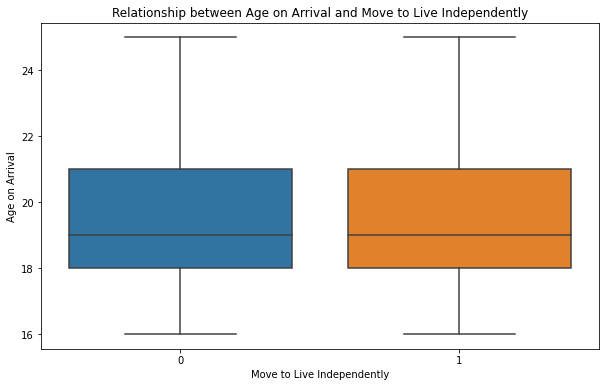

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the relationship between 'age_on_arrival' and 'move_to_live_independently'
plt.figure(figsize=(10, 6))
sns.boxplot(x='move_to_live_independently', y='age_on_arrival', data=final_merged_df)
plt.xlabel('Move to Live Independently')
plt.ylabel('Age on Arrival')
plt.title('Relationship between Age on Arrival and Move to Live Independently')
plt.show()

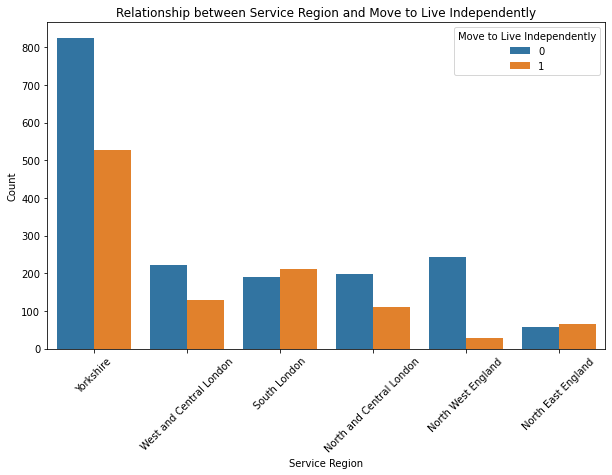

In [215]:
# Plot the relationship between 'service_region' and 'move_to_live_independently'
plt.figure(figsize=(10, 6))
sns.countplot(x='service_region', hue='move_to_live_independently', data=final_merged_df)
plt.xlabel('Service Region')
plt.ylabel('Count')
plt.title('Relationship between Service Region and Move to Live Independently')
plt.legend(title='Move to Live Independently')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

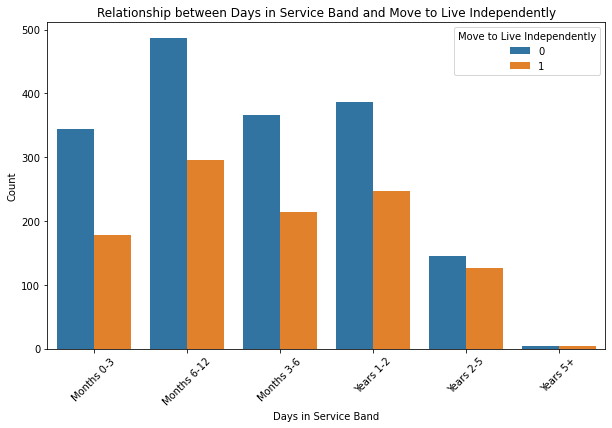

In [217]:
# Plot the relationship between 'service_region' and 'move_to_live_independently'
plt.figure(figsize=(10, 6))
sns.countplot(x='days_in_service_band', hue='move_to_live_independently', data=final_merged_df)
plt.xlabel('Days in Service Band')
plt.ylabel('Count')
plt.title('Relationship between Days in Service Band and Move to Live Independently')
plt.legend(title='Move to Live Independently')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

# Exporting merged datafile to begin pre-processing/modelling

In [206]:
final_merged_df.to_csv('/Users/aishamilsom/Documents/UCL/TERM 3/DATA/final_merged_df.csv', index=False)